# INFO 2950 Final Project - Phase IV
##### Janice Shen (js3678), Khai Xin Kuan (kk996), Sandy Lin (sl2534), David Park (yp358)

## Table of Content
1. [Introduction](#introduction) 
2. [Data Description and Cleaning](#data-description-and-cleaning) 
3. [Preregistration Statements](#preregistration-statements) 
4. [Data Analysis](#data-analysis) 
5. [Evaluation of significance](#evaluation-of-significance)
6. [Conclusion](#conclusion)
7. [Limitations](#limitations)
8. [Acknowledgements and Bibliography](#references)

## Introduction <a id="introduction"></a> 
A common interest in both music and finance led the four of us to explore a unique intersection between these fields. Specifically, we asked: could individual music preferences be related to broader economic trends in the United States? Inspired by prior research that suggested promising correlations between music sentiment and market performance (e.g., [weekly equity returns](https://lbsresearch.london.edu/id/eprint/2142/1/SSRN-id3776071.pdf)), we decided to investigate further. While excited by the potential connections, our initial data analysis revealed only weak correlations between music sentiment and economic indicators. This prompted us to refine our approaches and think about linear regression models or multivariate regressions we could run, hoping to reveal hidden trends. Thus we have done two hypothesis: one to reveal a strong inverse relationship between the valence of popular music and US GDP and the other showed unemployment showed a marginal positive effect on danceability, while other variables had negligible relationships.

## Research Questions:
1. **Can the valence of the general population's music preference be predicted by economics and socioeconomic indicators such as the unemployment rate, stocks, federal funds rate, stock returns, birth rate and incarceration rate?**
   - *Valence* represents the spectrum of emotions in music, ranging from negative (0) to positive (1).
   - **Goal:** We sought to determine whether broader socio-economic conditions influence the general emotional tone of music that people listen to.

2. **Can we predict the danceability of the general population's music preference based on key economic and socioeconomic variables such as death rate, recession, and unemployment rate?**
   - *Danceability* measures how suitable a track is for dancing, ranging from 0.0 (least danceable) to 1.0 (most danceable).
   - **Goal:** We explored whether this characteristic, often linked to musical enjoyment, also showed any connections to economic conditions.

### Initial Findings and Methodological Refinement:
Our original analysis included all songs in our dataset and yielded extremely weak correlations. We hypothesized that the inclusion of a large volume of less popular songs may have distorted the results, as these songs might not accurately reflect public sentiment or consumption patterns. To address this, we filtered out less popular songs using a *popularity* metric (a scale from 0 to 100, where 100 indicates the most popular songs). We created a cutoff of 70, focusing on the songs with popularity greater than 70 in our analysis to better capture the music that resonates with the general public. But when the correlation was still weak, we resulted to web scrape from Billboard top 100 and had more data points to run our current analysis. 

## Data Description and Cleaning <a id = "data-description-and-cleaning">

### Part 1: Data Description

#### What are the observations (rows) and the attributes (columns)?
**Observations**: Each row represents a song or an economic indicator for a specific time period. In the music dataset (musicdata), rows represent individual songs, while in the economic datasets (undata, econdata, us_gdp_data, us_entertainmentgdp_data), rows represent time intervals (e.g., months or quarters).  
**Attributes**: In the **music dataset**, the columns include variables like **valence** (a measure of positivity in music), **danceability**, **popularity**, **year**, and other sentiment-related metrics. For the **economic datasets** columns include **unemployment rate**, **GDP**, **federal funds rate**, and **Stock Returns**. For the **socio-economic datasets** columns include **incarceration rate**, **birth rates**, and **death rates**. 

#### Attribute Definitions:
Year: The year that corresponds to rest of the following variables present.<br>

**Music sentiments: a dimension of how one feels about the given music.**
  - danceability: Describes how suitable a track is for dancing, based on a combination of musical elements, including tempo, rhythm stability, beat strength, and overall regularity. Scale of 0.00 to 1.00
  - popularity: A metric that measures how popular an artist or song is on the platform. Scale of 0 to 100.<br>
  
**Economic datasets:**
  - Unemployment Rate: The unemployment rate of that year.
  - GDP: The Gross Domestic Product of that year.
  - Federal Funds Rate: Also known as the interest rate, the interest rate that banks charge each other to borrow money overnight
  - S&P500: The Standard and Poor's 500 is an index tracking the stock performance of 500 of the largest companies listed on US stock exchanges.
  
**Social/Socio-economical Variables:** <br>
  - Recession: Dummy variable of which is 1 if there was a recession recorded that year. 0 if not.
  - Election: Dummy variable of which is 1 if there was an election that year. 0 if not.
  - State_prisons: The imprisonment rates of state prisons at that year.
  - fertility: Fertility rate, total (births per woman).
  - Death Rate: Age-adjusted death rates (deaths per 100,000) per year (age-adjusted death rate means death rate if  age composition of the population didn't change from year to year).

#### Why was this dataset created?  
The **music sentiment datasets** were created to explore the relationship between musical attributes (such as valence, danceability, and popularity) and factors like popularity or music trends over time. The **economic datasets** were generated by governmental agencies and prestigious universities like the Federal Reserve or NYU Stern to monitor key economic indicators for research, policy analysis, and public transparency. The **socio-economic datasets** where compiled by government organizations or nonprofits for the betterment of society, such as the Prison Policy Initiative aiming to "uses research, advocacy, and organizing to dismantle mass incarceration;" the National Center under the Health Statistics (NCHS) under the US Centers for Disease Control and Prevention, to help public research on health; or the World Bank Group that has different "global partnership fighting poverty worldwide through sustainable solutions."

#### Who funded the creation of the dataset?
The **music sentiment dataset** were compiled by independent researchers, such as Caleb Elgut, likely with no explicit funding. These data sources rely on platforms like **Spotify**, **Billboard**, and **ARIA**, which collected the original data. The **economic datasets** were funded by the U.S. government through organizations like the **Federal Reserve** and the **Federal Reserve Bank of St. Louis (FRED)**, as part of their regular efforts to report and track national economic trends. The Stocks dataset is compiled by research done from **NYC Stern** and the socioeconomic datasets are gathered by non-part for government organizations: **Nation Center for Health Statistics**, **Prison Policy Initiative**

#### What processes might have influenced what data was observed and recorded and what was not?  
In the **music datasets**, factors like availability on Spotify, scraping techniques, and modern-day popularity metrics may have influenced the data observed. For example, older songs that were popular in the 1990s may have lower popularity today, potentially skewing the results when comparing them to historical economic data. In the **economic datasets**, revisions in how economic indicators like GDP and unemployment are calculated, government adjustments, and data collection methodologies could have impacted the recorded data. Additionally, the time series nature of the data means there may be adjustments due to seasonal variations or changes in reporting practices. Social variables, such as birth rates and incarceration rates, were only available on a yearly basis due to the high cost of gathering the data, limiting the granularity of the dataset. Additionally, the reliance on platforms like Spotify and Billboard charts means the data may be biased towards mainstream trends and digital listening habits, excluding other platforms and niche groups.

#### What preprocessing was done, and how did the data come to be in the form that you are using?  
- **Music datasets**: The data was scraped from platforms like **Spotify**. Preprocessing included cleaning missing values, and ensuring compatibility between different time periods in the analysis (there was no missing values when we loaded the files).  
- **Economic datasets**: The raw data provided by the **Federal Reserve** and **NYU Stern** was merged and aligned with the music data for time-series analysis. Preprocessing involved cleaning missing values, ensuring consistent date formats, and aligning economic metrics with the appropriate historical periods for comparison with music data.
- **Socio-economic datasets**: The dataset was cleaned and aggregated to match the yearly format of available social and economic data. Preprocessing steps included handling missing values, normalizing data across variables, and potentially transforming metrics such as valence and danceability into averages by year. Furthermore, non-relevant variables may have been removed, and multicollinearity checks were conducted to ensure the usability of the dataset in regression models (in our.

#### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
- **Music datasets**: The data originates from public platforms like **Spotify**, where users are generally aware that their listening habits are tracked. However, artists and listeners would likely be unaware of this specific usage of the data for correlating music preferences with economic trends.  
- **Economic and socio-economic datasets**: Data on these indicators is collected by government agencies or non-profits mentioned above with the understanding that it will be publicly available for research, policy analysis, and economic forecasting. Individuals were not directly involved in the data collection process. 

#### Where can your raw source data be found, if applicable?
1. **Music sentiment datasets**:  
   - Caleb Elgut's dataset scraped from Spotify can be found on GitHub: [Spotify-LSTM Data](https://github.com/calebelgut/spotify-lstm/tree/main/Data)  

2. **Economic datasets:**  
   - Unemployment rate data from Jan 1948 – Sep 2024 is available through the Federal Reserve Economic Data (FRED) platform: [Unemployment Rate](https://fred.stlouisfed.org/series/UNRATE)  
   - Quarterly GDP from Jan 1997 – 2019: [Quarterly GDP](https://fred.stlouisfed.org/series/GDP)  
   - Yearly GDP of the Music/Entertainment Industry from 1997 – 2019: [Entertainment Industry GDP](https://fred.stlouisfed.org/series/USPRFRMSPRTMSMNGSP)
   - Annual Returns on Investment of US Stocks (including dividends) from 1928-2023: [Stock Returns](https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSP.html)
  
3. **Socio-Economic Datasets**:
    - Mortality trends since 1900-2018 by NCHS: [Death Rate](https://www.cdc.gov/nchs/data-visualization/mortality-trends/index.htm)
    - Fertility rate, total (births per woman) by the World Bank: [Birth Rate](https://data.worldbank.org/indicator/SP.DYN.TFRT.IN?locations=US)
    - Recession generated by FRED, borrowing expterise from The National Bureau of Economic Research (NBER): [Recession](https://fred.stlouisfed.org/series/USREC)
    - Incarceration data from non-profit and non-partisan Prison Policy Initative: [Incarceration](https://www.prisonpolicy.org/data/)
    - election variable self-generated by assign 1 or 0 every 4 years (1 when had election and 0 when no election, more specific code in recession_and_election.ipynb.
  
### P2 Cleaning 
**Overall Summary:** From our feedback in Phase 2, we chose to web scrape directly from Billboard and match the Billboard song data with Spotify’s sentiment data. This was done by using song titles and artist names as common identifiers. Variations in how song names or artist names were spelled were resolved to make sure the match was accurate. Economic data(eg. Fed fund rate, unemployment rate) was collected through different government sources and merged all economic data into one dataset. Additional control variables were collected to provide context to the economic variables(eg, birth rate, death rate, recession) or other factors influencing music trends. The web-scraping process could be found in billboard_scraping.ipynb.

**Data Standardization:**
- Ensuring consistent formats for song titles and artist names in billboard and spotify dataset
- Ensuring economic variables were comparable across different datasets.
- Handling Missing Data: Missing values were identified and addressed by either excluding records or using imputation methods depending on the context of the missing data and its potential impact on analysis.

**Final Merged Dataset:** 
- After the cleaning and merging steps, a comprehensive, standardized dataset was created that included:
  - Billboard data (song rankings and deta)
  - Spotify sentiment data (emotional tone of songs)
  - Economic data (macroeconomic indicators)
  - Control variables (additional contextual factors).
**After merging all of these variable in the file name final_clean_data**

In [1]:
import pandas as pd
import numpy as np
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.api import OLS, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import (train_test_split, KFold, 
cross_val_score, cross_validate)

Final dataset that contains a comprehensive overview of all the music sentiment information, economic information, and additional control variable factors 

In [2]:
final = pd.read_csv('final_clean_data.csv')

inspect the data and see the columns present in the table

In [3]:
final.head() 

,Unnamed: 0,danceability,valence,year,fedfundrate,UnemploymentRate,recession,election,US_GDP,year_1,State_prisons,fertility,DeathRate,S&P500
0,0,0.325,0.9130,1960,3.215833,5.541667,1,1,542.38225,1960,189735.0,3.654,1339.2,0.0
1,1,0.533,0.1905,1960,3.215833,5.541667,1,1,542.38225,1960,189735.0,3.654,1339.2,0.0
2,2,0.498,0.8660,1960,3.215833,5.541667,1,1,542.38225,1960,189735.0,3.654,1339.2,0.0
3,3,0.447,0.3300,1960,3.215833,5.541667,1,1,542.38225,1960,189735.0,3.654,1339.2,0.0
4,4,0.558,0.3030,1960,3.215833,5.541667,1,1,542.38225,1960,189735.0,3.654,1339.2,0.0


Dropping index column not used in our analysis:

In [4]:
print(final.columns) 
final.drop(columns=['year_1','Unnamed: 0'], axis=1, inplace=True)
print(final.columns) 
final.head()
# print(final.shape)

Index(['Unnamed: 0', 'danceability', 'valence', 'year', 'fedfundrate',
       'UnemploymentRate', 'recession', 'election', 'US_GDP', 'year_1',
       'State_prisons', 'fertility', 'DeathRate', 'S&P500'],
      dtype='object')
Index(['danceability', 'valence', 'year', 'fedfundrate', 'UnemploymentRate',
       'recession', 'election', 'US_GDP', 'State_prisons', 'fertility',
       'DeathRate', 'S&P500'],
      dtype='object')


,danceability,valence,year,fedfundrate,UnemploymentRate,recession,election,US_GDP,State_prisons,fertility,DeathRate,S&P500
0,0.325,0.9130,1960,3.215833,5.541667,1,1,542.38225,189735.0,3.654,1339.2,0.0
1,0.533,0.1905,1960,3.215833,5.541667,1,1,542.38225,189735.0,3.654,1339.2,0.0
2,0.498,0.8660,1960,3.215833,5.541667,1,1,542.38225,189735.0,3.654,1339.2,0.0
3,0.447,0.3300,1960,3.215833,5.541667,1,1,542.38225,189735.0,3.654,1339.2,0.0
4,0.558,0.3030,1960,3.215833,5.541667,1,1,542.38225,189735.0,3.654,1339.2,0.0


There are rows in S&P500 where the value equal to 0. Drop the rows. 

In [5]:
final = final[final['S&P500'] != 0]
final.head()

,danceability,valence,year,fedfundrate,UnemploymentRate,recession,election,US_GDP,State_prisons,fertility,DeathRate,S&P500
83,0.565,0.9635,1961,1.955,6.691667,1,0,562.20975,196453.0,3.62,1298.8,0.27
84,0.525,0.6310,1961,1.955,6.691667,1,0,562.20975,196453.0,3.62,1298.8,0.27
85,0.529,0.7410,1961,1.955,6.691667,1,0,562.20975,196453.0,3.62,1298.8,0.27
86,0.354,0.6230,1961,1.955,6.691667,1,0,562.20975,196453.0,3.62,1298.8,0.27
87,0.481,0.9535,1961,1.955,6.691667,1,0,562.20975,196453.0,3.62,1298.8,0.27


Run the correlation matrix to see the strength and direction between variables

In [6]:
final.corr()

,danceability,valence,year,fedfundrate,UnemploymentRate,recession,election,US_GDP,State_prisons,fertility,DeathRate,S&P500
danceability,1.000000,0.478538,0.208863,-0.012125,0.028724,-0.063176,0.035226,0.173858,0.190238,-0.170664,-0.224345,-0.003924
valence,0.478538,1.000000,-0.244164,0.140404,0.010264,0.037190,-0.009652,-0.239765,-0.240677,0.113077,0.232455,0.020581
year,0.208863,-0.244164,1.000000,-0.484333,0.112782,-0.168513,0.114511,0.968421,0.958372,-0.528370,-0.976610,-0.052381
fedfundrate,-0.012125,0.140404,-0.484333,1.000000,0.026551,0.333548,-0.077159,-0.614557,-0.593281,-0.243675,0.352490,0.037377
UnemploymentRate,0.028724,0.010264,0.112782,0.026551,1.000000,0.146262,-0.042659,0.056056,-0.007095,-0.304178,-0.230308,0.243424
recession,-0.063176,0.037190,-0.168513,0.333548,0.146262,1.000000,-0.136231,-0.158056,-0.184399,0.048557,0.135190,-0.167556
election,0.035226,-0.009652,0.114511,-0.077159,-0.042659,-0.136231,1.000000,0.114523,0.082246,-0.109818,-0.098228,-0.036805
US_GDP,0.173858,-0.239765,0.968421,-0.614557,0.056056,-0.158056,0.114523,1.000000,0.953831,-0.356798,-0.907178,-0.093406
State_prisons,0.190238,-0.240677,0.958372,-0.593281,-0.007095,-0.184399,0.082246,0.953831,1.000000,-0.319037,-0.904853,-0.068427
fertility,-0.170664,0.113077,-0.528370,-0.243675,-0.304178,0.048557,-0.109818,-0.356798,-0.319037,1.000000,0.630240,-0.014068


Heatmap is used to better visualize the correlation

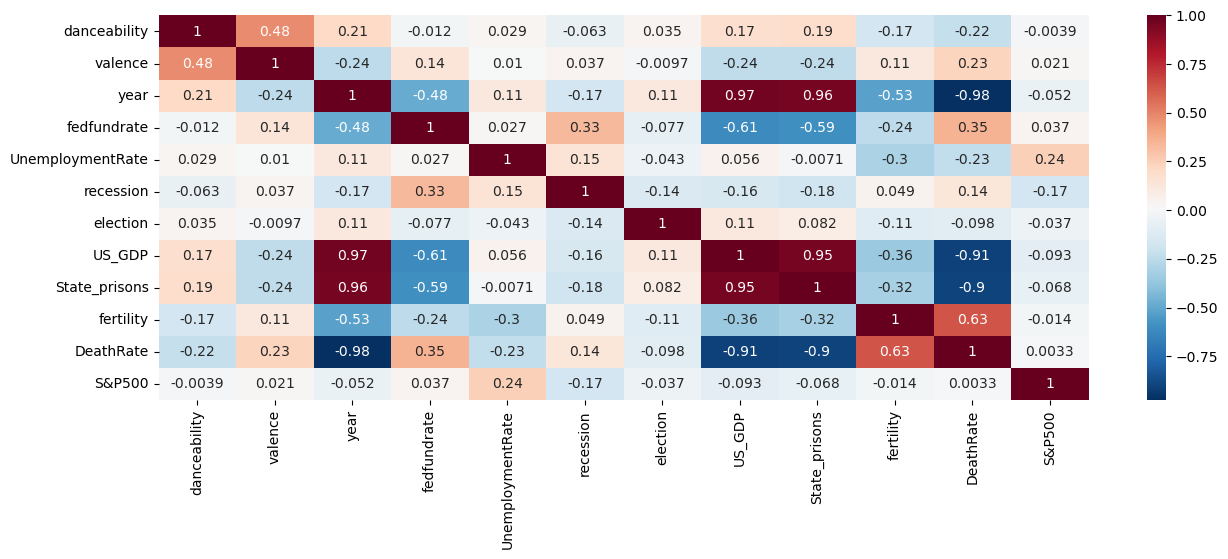

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))
heatmap = sns.heatmap(final.corr(numeric_only=True), cmap="RdBu_r", annot=True)

Based on the previous iteration (can be found in the appendix below), we conclude that a model that use one value to predict a range of data will not be robust. For instance, as we only have one economical indicator like GDP per year, it is not be ideal for us to train our model to predict a wide range of music valence from 0 to 1. Refer to the regression plot for a better visualization. Hence, we decide to average the valence and danceabilty of songs per year. This will ensure that our model take it one value for each independent variable and predict one value for the dependet variable. 

Created a data frame averaging danceability and valence of songs per year. 

In [8]:
averagefinal = duckdb.sql(""" 
                                SELECT
                                    Year,
                                    ANY_VALUE(recession) AS recession,
                                    ANY_VALUE(election) AS election,
                                    AVG(danceability) AS avg_danceability,
                                    AVG(valence) AS avg_valence,
                                    ANY_VALUE(US_GDP) AS gdp,
                                    ANY_VALUE(UnemploymentRate) AS unemployment,
                                    ANY_VALUE(fedfundrate) AS fedfundrate,
                                    ANY_VALUE(State_prisons) AS imprisonment,
                                    ANY_VALUE(fertility) AS fertility, 
                                    ANY_VALUE(DeathRate) AS deathrate, 
                                    ANY_VALUE("S&P500") AS "S&P500"
                                FROM
                                    final
                                GROUP BY
                                    Year
                                ORDER BY
                                    Year
                                """).df()

averagefinal.head()
print(averagefinal.shape)

(55, 12)


Based on the later analysis and modeling, we noticed multilinearity problem due to the large values we have for gdp and death rate. Hence, we will add 2 new columns for log_gdp and log_deathrate to smoosh the data into smaller range. 

In [9]:
averagefinal["log_deathrate"]=np.log(averagefinal["deathrate"])
averagefinal["log_gdp"]=np.log(averagefinal["gdp"])
averagefinal.head()

,year,recession,election,avg_danceability,avg_valence,gdp,unemployment,fedfundrate,imprisonment,fertility,deathrate,S&P500,log_deathrate,log_gdp
0,1961,1,0,0.539533,0.714757,562.20975,6.691667,1.955000,196453.0,3.620,1298.8,0.27,7.169196,6.331875
1,1962,0,0,0.562227,0.701820,603.92150,5.566667,2.708333,194886.0,3.461,1323.6,-0.09,7.188111,6.403444
2,1963,0,0,0.545594,0.714175,637.45150,5.641667,3.178333,194155.0,3.319,1346.3,0.23,7.205115,6.457478
3,1964,0,1,0.531146,0.692634,684.46150,5.158333,3.496667,192627.0,3.190,1303.8,0.16,7.173038,6.528632
4,1965,0,0,0.526300,0.652230,742.29025,4.508333,4.075000,189855.0,2.913,1306.5,0.12,7.175107,6.609740


Created a heatmap to project the correlation matrix:

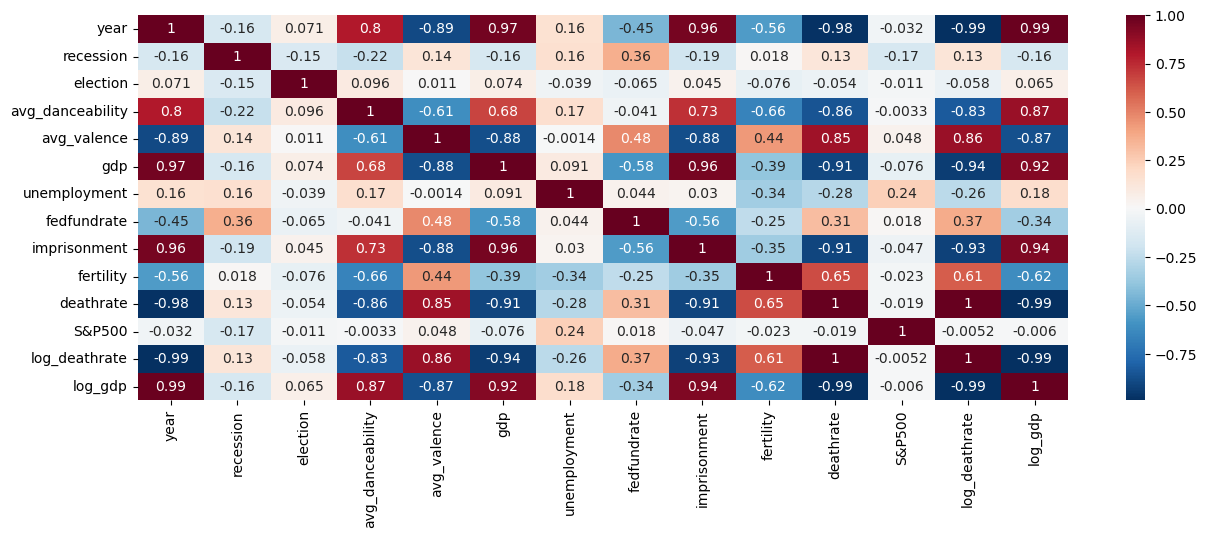

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))
heatmap = sns.heatmap(averagefinal.corr(numeric_only=True), cmap="RdBu_r", annot=True)

## Pre-registration Statement <a id="preregistration-statements"></a>

#### Hypothesis 1: Music Valence vs. US GDP
The average valence of popular songs by year from 1960-2016 in the US has an inverse relationship with the corresponding US Gross Domestic Product (GDP) of the given year.

- $H_0$: The average valence of the top 100 Spotify songs per year has no relationship to the US GDP each year ($\beta = 0$).
- $H_A$: The average valence of the top 100 Spotify songs per year has an inverse relationship to the US GDP each year ($\beta < 0$).

We hypothesize a statistically significant negative coefficient ($\beta_1 < 0$) for GDP per capita. During periods of economic prosperity (higher GDP), cultural sentiments may reflect more subdued emotions in music, leading to lower valence scores. This relationship is supported by existing literature on the connection between societal well-being and cultural expressions, which indicates that wealthier societies may prioritize complexity or emotional depth in art over positivity.

To test this hypothesis, we will conduct a simple linear regression using GDP per capita as the independent variable and average valence of songs as the dependent variable. The regression will determine the direction and strength of the relationship, supported by visualizations such as scatterplots with fitted regression lines.A residual plot is plotted to visually assess how well a regression model fits the data by displaying the difference between the actual data points and the predicted values (residuals). If there is heteroskedasticity, transformation is required. Evaluation metrics like RMSE and MAE will be examined to ensure model's robustness. Finally, statistical metrics from the OLS model, such as p-values, will evaluate the significance of the model.


#### Hypothesis 2: Danceability vs Macroeconomic and sociopolitical factors (unemployment rate, election indicator, death rate, S&P 500, and recession)
The macroeconomic and sociopolitical factors (unemployment rate, election indicator, death rate, S&P 500, and recession) have relationship with the average danceability of the most popular songs per year from 1960-2016 in the US.

- $H_0$: The macroeconomic and sociopolitical factors (unemployment rate, election indicator, death rate, S&P 500, and recession) have no relationship with the average danceability of the most popular songs per year from 1960-2016 in the US. ($\beta_1, \beta_2, \beta_3, \beta_4,\beta_5 = 0$)
- $H_A$: The macroeconomic and sociopolitical factors (unemployment rate, election indicator, death rate, S&P 500, and recession) has relationship with the average danceability of the most popular songs per year from 1960-2016 in the US. (at least one $\beta_n$ $\neq$ 0 for n=1,2,3,4,5)

We expect a statistically significant negative coefficient ($\beta_1 < 0$) for unemployment rate, reflecting an inverse relationship between unemployment and danceability.


To test this hypothesis, we will conduct a multivariate linear regression using average danceability of songs as the dependent variable and unemployment rate as the primary independent variable. Additional economic and social variables, such as death rate, election years, S&P 500, and recession indicators, will be included as covariates to account for potential confounders.A residual plot is plotted to visually assess how well a regression model fits the data by displaying the difference between the actual data points and the predicted values (residuals). Evaluation metrics like RMSE and MAE will be examined to ensure model's robustness. Finally, statistical metrics from the OLS model, such as p-values, will evaluate the significance of the model.


### Hypothesis 1: 

We first take the correlation of our variables. Computing correlations provides preliminary insights into the relationships between variables, such as whether GDP and valence are inversely related.

We then take a **linear regression**, **evaluate the regression fit**, **make a scatterplot for visualization**, and **explore other variables**. 
- Linear regression: Running a simple linear regression estimates how average GDP influences valence. This allows us to test our hypothesis that valence decreases as GDP increases (β < 0).
- Calculating Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) evaluates how well the regression model fits the data. These metrics help measure prediction error.
- Plotting the fitted regression line on the scatter plot visually illustrates the relationship between GDP and valence, aiding interpretation.
- Evaluating other variables helps identify the relative importance of different economic and social variables in explaining valence trends.


GDP Coeff: -0.0523
Intercept: 1.0458


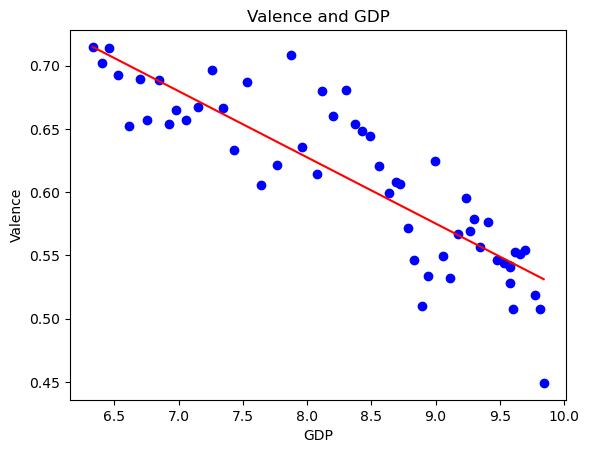

In [11]:
# --- GDP and Valence ---
X_gdp = averagefinal[["log_gdp"]].values
y_gdp = averagefinal["avg_valence"].values
model = LinearRegression().fit(X_gdp, y_gdp)
print("GDP Coeff:", round(model.coef_[0], 4))
print(f"Intercept: {model.intercept_:.4f}")
y_pred_gdp = model.predict(X_gdp)

plt.scatter(X_gdp, y_gdp, color="blue")
plt.plot(X_gdp, y_pred_gdp, color="red", label="Fitted line")
plt.title("Valence and GDP")
plt.xlabel("GDP")
plt.ylabel("Valence")


# Show the plot
plt.show()

Residual plot is plotted to check if there is any heteroskedasticity. If there is, we will be required to transform the data. Based on the findings,  GDP is not heteroskedastic. 

Text(0, 0.5, 'Residuals')

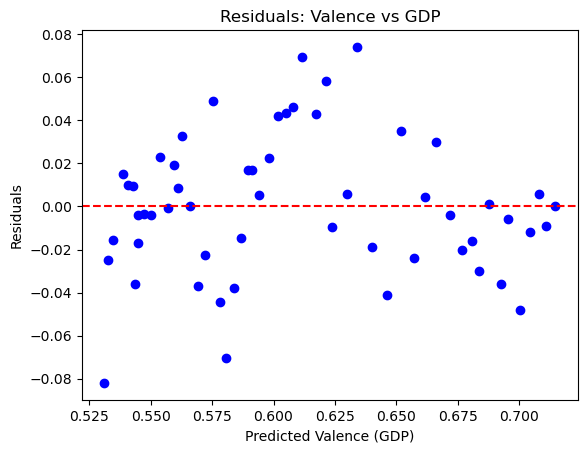

In [12]:
# GDP and Valence
X_gdp = averagefinal[["log_gdp"]].values
y_gdp = averagefinal["avg_valence"].values
model = LinearRegression().fit(X_gdp, y_gdp)
y_pred_gdp = model.predict(X_gdp)


residuals_gdp = y_gdp - y_pred_gdp


plt.scatter(y_pred_gdp, residuals_gdp, color="blue")
plt.axhline(y=0, color='red', linestyle='--')  # Add a line at zero
plt.title("Residuals: Valence vs GDP")
plt.xlabel("Predicted Valence (GDP)")
plt.ylabel("Residuals")

Perform cross validation to examine model performance and generalizability.

In [13]:
X = averagefinal[['log_gdp']]
y = averagefinal['avg_valence']
kf = KFold(n_splits = 5)
results = cross_validate(
    LinearRegression(),X,y,
    scoring='neg_root_mean_squared_error',
    cv=kf,return_train_score=True)
results_df = pd.DataFrame({
    'Train_RMSE':np.round(-1*results['train_score'],4),
    'Test_RMSE':np.round(-1*results['test_score'],4)})
print('Table summarizing train and test RMSE values across splits:') 
print(results_df)
print('Mean Train RMSE:',round(np.mean(results_df['Train_RMSE']),4))
print('Mean Test RMSE:', round(np.mean(results_df['Test_RMSE']),4))
print('Std Train RMSE:',round(np.std(results_df['Train_RMSE']),4))
print('Std Test RMSE:',round(np.std(results_df['Test_RMSE']),4))
print('Normalized Test RMSE:',round(
    np.mean(results_df['Test_RMSE'])/(averagefinal['avg_valence'].max() - 
                                      averagefinal['avg_valence'].min()),4))

Table summarizing train and test RMSE values across splits:
   Train_RMSE  Test_RMSE
0      0.0327     0.0477
1      0.0313     0.0365
2      0.0304     0.0410
3      0.0316     0.0349
4      0.0321     0.0386
Mean Train RMSE: 0.0316
Mean Test RMSE: 0.0397
Std Train RMSE: 0.0008
Std Test RMSE: 0.0045
Normalized Test RMSE: 0.1496


Based on the RMSE values above, we can conclude: 
* The model seems to have consistent performance across different splits, as indicated by the similar train and test RMSE values for each split. The RMSE values are contained in a small range, from 0.0304-0.0477.
* The mean train RMSE value is relatively lower than the mean test RMSE. This indicates that in general the model perform better in the training model. The mean test RMSE value of 0.0316 suggests that on average, the model's predictions are within a reasonable range of the actual values in the test data.
* Looking across splits, the test RMSE values are relatively close to the training RMSE values. Additionally, the train and test RMSE means across splits are approximately equal, with the mean train RMSE at 0.0316 and the mean test RMSE at 0.0397. Thus, we can assume reasonable generalization to unseen data. 
* The standard deviation of the Train RMSE is 0.0008, showing relatively low variability in the model's predictions between training sets.
* The standard deviation of the Test RMSE is 0.0045, suggesting higher variability compared to the training set. Therefore, we can conclude that the model's ability to generalize to unseen data is less consistent. However, based on the fact that that the mean train RMSE and mean test RMSE are similar, and that the test standard deviation is still relatively low, we can still assume reasonable generalization.
* We decided to calculate and analyze the normalized RMSE value for hypothesis 1 to gain a better idea of if this RMSE value was “good.” Based on an article we found about normalizing RMSE, we calculated the normalized RMSE to get a value between 0 and 1 where values closer to 0 are considered “better” results. This is helpful because RMSE values are sometimes hard to compare because of unit inconsistencies and the range of the dataset itself. From this normalization, we got an RMSE value of 0.1496, which is relatively close to 0 and thus suggests the regression model fits the test data well. 
* The referenced article can be found at the following link: https://www.statology.org/what-is-a-good-rmse/#:~:text=Normalizing%20the%20RMSE%20Value&text=This%20produces%20a%20value%20between,is%20between%20%2470%2C000%20and%20%24300%2C000 

In [14]:
mae = mean_absolute_error(y, model.predict(X))
print(f'MAE: {round(mae,5)}')  

MAE: 0.02503


/opt/anaconda3/envs/info2950/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


RMSE greater than MAE. Model is reliable 

### OLS Regression to evaluate significance

Finally, we run an OLS regression. Running an OLS regression with statistical output provides detailed metrics, such as p-values and confidence intervals, which are crucial for hypothesis testing.

In [15]:
X = averagefinal[["log_gdp"]]
y = averagefinal["avg_valence"] 

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            avg_valence   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     163.1
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           8.35e-18
Time:                        19:25:42   Log-Likelihood:                 110.80
No. Observations:                  55   AIC:                            -217.6
Df Residuals:                      53   BIC:                            -213.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0458      0.034     30.373      0.0

# Summary
- alpha value: 5%
- single sided t test, so p/2
- p/2 value equal 0.000
- statistically significant, B<0
- every 1% increase in gdp will cause average valence of popular songs in the year to decrease by 0.0005 unit. (reasonable since the scale of valence is only 0-1).

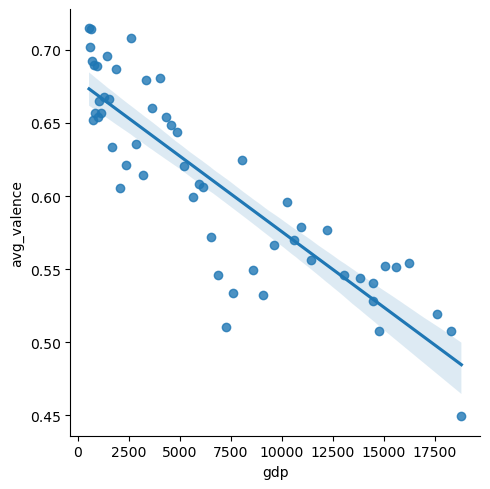

In [16]:
#bootstrap to get the confidence interval 

sns.lmplot(x="gdp", y= "avg_valence" , data=averagefinal, fit_reg=True, ci=95, n_boot=1000)

Light blue region shows regression lines within the  at 95% confidence level. 

# Expanding Hypothesis 1

Fertility Coeff: 0.0658
Intercept: 0.4702
Death Rate Coeff: 0.0003
Intercept: 0.3183
Fed Funds Rate Coeff: 0.0088
Intercept: 0.5632


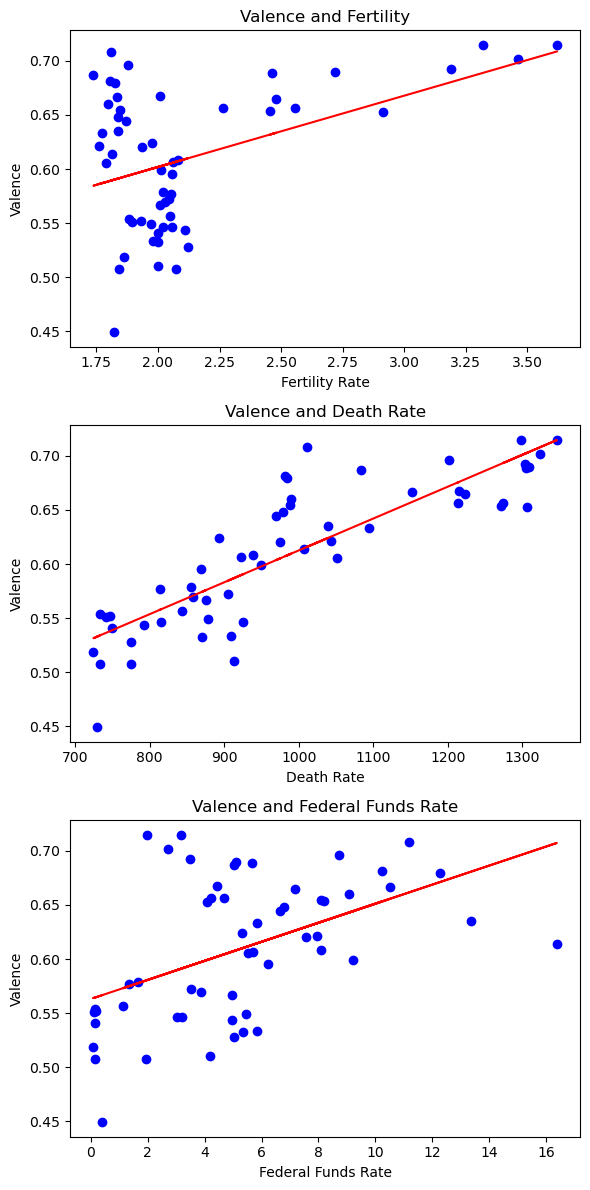

In [17]:
# Create a 3x1 grid of subplots
fig, axs = plt.subplots(3, figsize=(6, 12))

# --- Fertility and Valence ---
X_fertility = averagefinal[["fertility"]].values
y_fertility = averagefinal["avg_valence"].values
model = LinearRegression().fit(X_fertility, y_fertility)
print("Fertility Coeff:", round(model.coef_[0], 4))
print(f"Intercept: {model.intercept_:.4f}")
y_pred_fertility = model.predict(X_fertility)

axs[0].scatter(X_fertility, y_fertility, color="blue")
axs[0].plot(X_fertility, y_pred_fertility, color="red", label="Fitted line")
axs[0].set_title("Valence and Fertility")
axs[0].set_xlabel("Fertility Rate")
axs[0].set_ylabel("Valence")

# --- Death Rate and Valence ---
X_deathrate = averagefinal[["deathrate"]].values
y_deathrate = averagefinal["avg_valence"].values
model = LinearRegression().fit(X_deathrate, y_deathrate)
print("Death Rate Coeff:", round(model.coef_[0], 4))
print(f"Intercept: {model.intercept_:.4f}")
y_pred_deathrate = model.predict(X_deathrate)

axs[1].scatter(X_deathrate, y_deathrate, color="blue")
axs[1].plot(X_deathrate, y_pred_deathrate, color="red", label="Fitted line")
axs[1].set_title("Valence and Death Rate")
axs[1].set_xlabel("Death Rate")
axs[1].set_ylabel("Valence")

# --- Federal Funds Rate and Valence ---
X_fedfundrate = averagefinal[["fedfundrate"]].values
y_fedfundrate = averagefinal["avg_valence"].values
model = LinearRegression().fit(X_fedfundrate, y_fedfundrate)
print("Fed Funds Rate Coeff:", round(model.coef_[0], 4))
print(f"Intercept: {model.intercept_:.4f}")
y_pred_fedfundrate = model.predict(X_fedfundrate)

axs[2].scatter(X_fedfundrate, y_fedfundrate, color="blue")
axs[2].plot(X_fedfundrate, y_pred_fedfundrate, color="red", label="Fitted line")
axs[2].set_title("Valence and Federal Funds Rate")
axs[2].set_xlabel("Federal Funds Rate")
axs[2].set_ylabel("Valence")

# Adjust layout to avoid overlap
plt.tight_layout()

Residual plot is plotted to check if there is any heteroskedasticity. If there is, we will be required to transform the data. Based on the findings, fertility is heteroskedastic and therefore we will run log transformation in the next cell. 

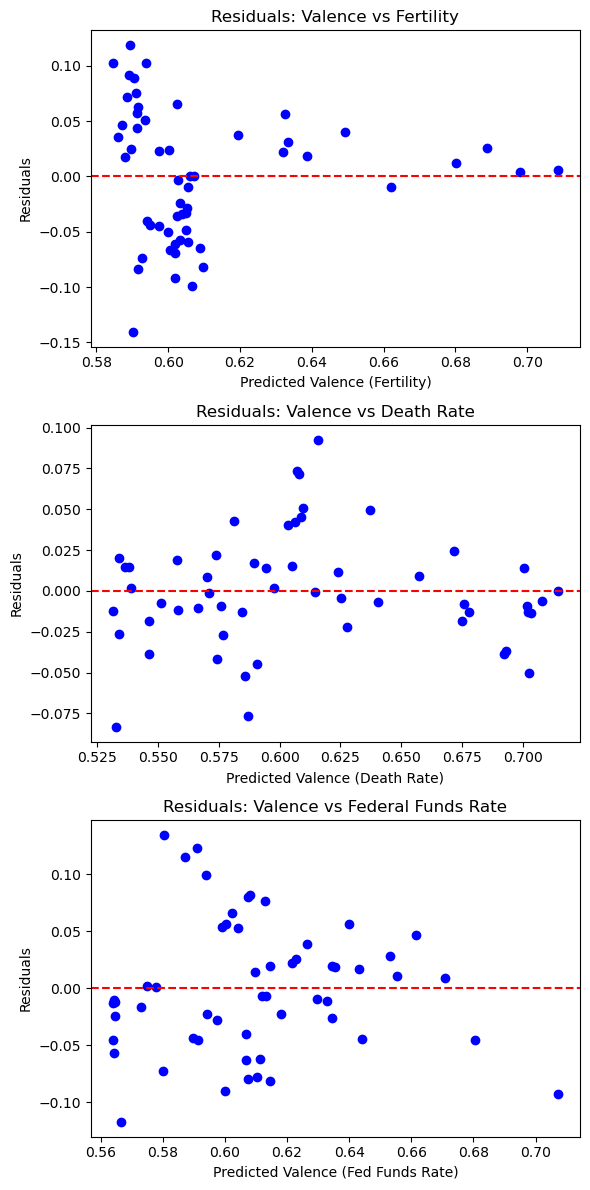

In [18]:
fig, axs = plt.subplots(3, figsize=(6, 12))


# Fertility and Valence
X_fertility = averagefinal[["fertility"]].values
y_fertility = averagefinal["avg_valence"].values
model = LinearRegression().fit(X_fertility, y_fertility)
y_pred_fertility = model.predict(X_fertility)


residuals_fertility = y_fertility - y_pred_fertility


axs[0].scatter(y_pred_fertility, residuals_fertility, color="blue")
axs[0].axhline(y=0, color='red', linestyle='--')  # Add a line at zero
axs[0].set_title("Residuals: Valence vs Fertility")
axs[0].set_xlabel("Predicted Valence (Fertility)")
axs[0].set_ylabel("Residuals")

# Death Rate and Valence
X_deathrate = averagefinal[["deathrate"]].values
y_deathrate = averagefinal["avg_valence"].values
model = LinearRegression().fit(X_deathrate, y_deathrate)
y_pred_deathrate = model.predict(X_deathrate)


residuals_deathrate = y_deathrate - y_pred_deathrate


axs[1].scatter(y_pred_deathrate, residuals_deathrate, color="blue")
axs[1].axhline(y=0, color='red', linestyle='--')  # Add a line at zero
axs[1].set_title("Residuals: Valence vs Death Rate")
axs[1].set_xlabel("Predicted Valence (Death Rate)")
axs[1].set_ylabel("Residuals")

# Federal Funds Rate and Valence 
X_fedfundrate = averagefinal[["fedfundrate"]].values
y_fedfundrate = averagefinal["avg_valence"].values
model = LinearRegression().fit(X_fedfundrate, y_fedfundrate)
y_pred_fedfundrate = model.predict(X_fedfundrate)


residuals_fedfundrate = y_fedfundrate - y_pred_fedfundrate


axs[2].scatter(y_pred_fedfundrate, residuals_fedfundrate, color="blue")
axs[2].axhline(y=0, color='red', linestyle='--')  # Add a line at zero
axs[2].set_title("Residuals: Valence vs Federal Funds Rate")
axs[2].set_xlabel("Predicted Valence (Fed Funds Rate)")
axs[2].set_ylabel("Residuals")


plt.tight_layout()

# Show the plot
plt.show()

Log transformation is performed on fertility variable and residual plot is plotted again to see it's effect. Notice that eventhough after log transformation, heteroskedasticity is still noticed from the residual plot. 

Log(Fertility) Coeff: 0.1528
Intercept: 0.4975


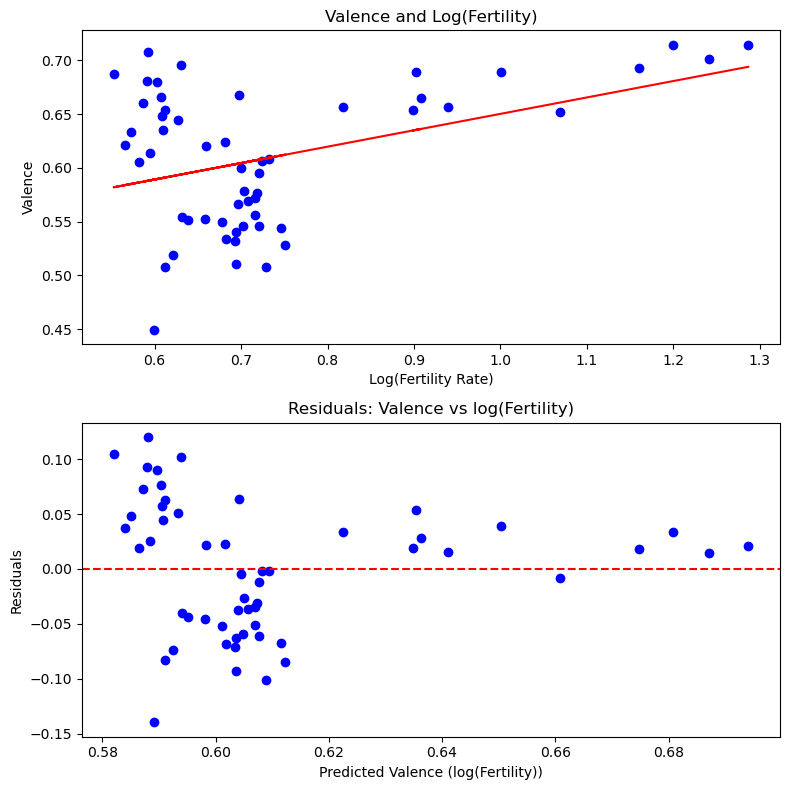

In [19]:
fig, axs = plt.subplots(2,1, figsize=(8, 8))

#Logged Fertility and Valence 
X_fer = np.log(averagefinal[["fertility"]].values)
y_fertility = averagefinal["avg_valence"].values
model = LinearRegression().fit(X_fer, y_fertility)
print("Log(Fertility) Coeff:", round(model.coef_[0], 4))
print(f"Intercept: {model.intercept_:.4f}")
y_pred_fertility = model.predict(X_fer) 

axs[0].scatter(X_fer, y_fertility, color="blue")
axs[0].plot(X_fer, y_pred_fertility, color="red", label="Fitted line")
axs[0].set_title("Valence and Log(Fertility)")
axs[0].set_xlabel("Log(Fertility Rate)")
axs[0].set_ylabel("Valence")

residuals_fertility = y_fertility - y_pred_fertility

axs[1].scatter(y_pred_fertility, residuals_fertility, color="blue")
axs[1].axhline(y=0, color='red', linestyle='--')  # Add a line at zero
axs[1].set_title("Residuals: Valence vs log(Fertility)")
axs[1].set_xlabel("Predicted Valence (log(Fertility))")
axs[1].set_ylabel("Residuals")


plt.tight_layout()

To find a suitable transformation for fertility data, we use boxcox. Based on the reading online, if the lamda value is equal to 0, then log transformation will be done. If lambda value not equal to zero, $(x^{lambda}-1)/lamda$. In our case, lamda equal to -4.74

In [20]:
from scipy import stats

transformed_data, lambda_value = stats.boxcox(averagefinal["fertility"])

In [21]:
# if lambda is 1, then no transformation is needed. If it is 0, then log transformation. Else, x^{lambda}-1)/lamda.
print(f'lambda value: {lambda_value}')
print(transformed_data)

lambda value: -4.743605571021893
[0.21033848 0.21022649 0.21009818 0.20995088 0.20948807 0.20898322
 0.2083612  0.20788527 0.2078398  0.2079737  0.20645821 0.20312502
 0.20022998 0.19897136 0.19691206 0.19549253 0.19749157 0.19637978
 0.19810894 0.19910811 0.1982414  0.19873911 0.19780469 0.19805884
 0.19924295 0.19904757 0.200041   0.20158323 0.20319715 0.20429181
 0.20400977 0.20374567 0.203295   0.20296896 0.20251712 0.20247723
 0.20237648 0.20292234 0.20307951 0.20390718 0.20348618 0.20331263
 0.20377018 0.20383506 0.20392308 0.20467846 0.20484137 0.20415641
 0.20297825 0.20151503 0.20063436 0.20026995 0.19977793 0.19922807
 0.19851735]


Fertility Coeff: 3.4372
Intercept: -0.0871


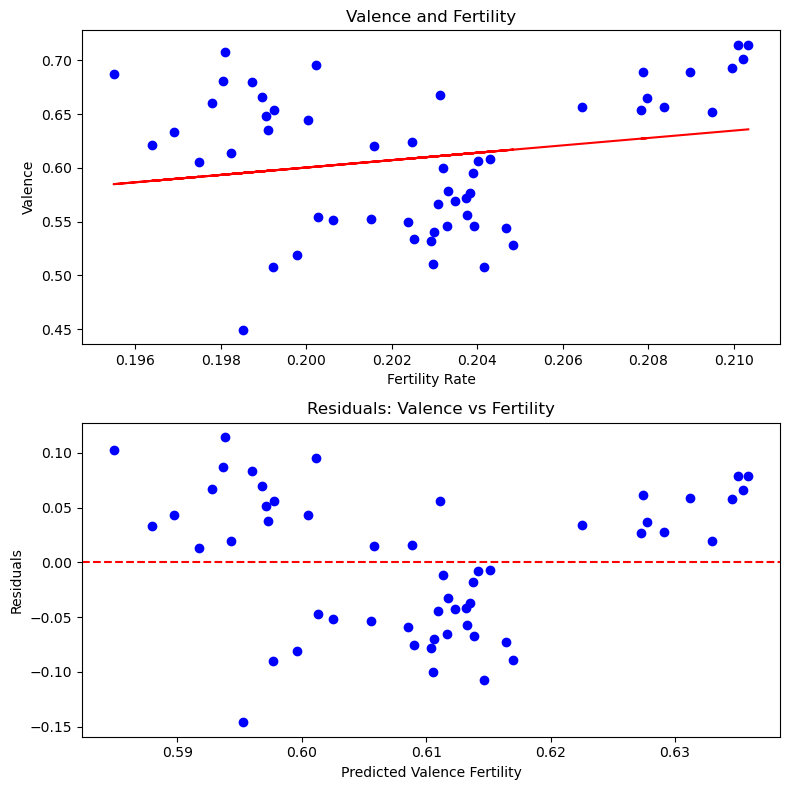

In [22]:
fig, axs = plt.subplots(2,1, figsize=(8, 8))

#Logged Fertility and Valence 
X_fer = transformed_data.reshape(-1,1)
y_fertility = averagefinal["avg_valence"].values
model = LinearRegression().fit(X_fer, y_fertility)
print("Fertility Coeff:", round(model.coef_[0], 4))
print(f"Intercept: {model.intercept_:.4f}")
y_pred_fertility = model.predict(X_fer) 

axs[0].scatter(X_fer, y_fertility, color="blue")
axs[0].plot(X_fer, y_pred_fertility, color="red", label="Fitted line")
axs[0].set_title("Valence and Fertility")
axs[0].set_xlabel("Fertility Rate")
axs[0].set_ylabel("Valence")

residuals_fertility = y_fertility - y_pred_fertility

axs[1].scatter(y_pred_fertility, residuals_fertility, color="blue")
axs[1].axhline(y=0, color='red', linestyle='--')  # Add a line at zero
axs[1].set_title("Residuals: Valence vs Fertility")
axs[1].set_xlabel("Predicted Valence Fertility")
axs[1].set_ylabel("Residuals")

plt.tight_layout()


After the transformation, there is no heteroskedasticity noted on the residual plot anymore

In [23]:
# add transformed data to the new col
averagefinal['trans_fertility']= transformed_data
averagefinal.head()

,year,recession,election,avg_danceability,avg_valence,gdp,unemployment,fedfundrate,imprisonment,fertility,deathrate,S&P500,log_deathrate,log_gdp,trans_fertility
0,1961,1,0,0.539533,0.714757,562.20975,6.691667,1.955000,196453.0,3.620,1298.8,0.27,7.169196,6.331875,0.210338
1,1962,0,0,0.562227,0.701820,603.92150,5.566667,2.708333,194886.0,3.461,1323.6,-0.09,7.188111,6.403444,0.210226
2,1963,0,0,0.545594,0.714175,637.45150,5.641667,3.178333,194155.0,3.319,1346.3,0.23,7.205115,6.457478,0.210098
3,1964,0,1,0.531146,0.692634,684.46150,5.158333,3.496667,192627.0,3.190,1303.8,0.16,7.173038,6.528632,0.209951
4,1965,0,0,0.526300,0.652230,742.29025,4.508333,4.075000,189855.0,2.913,1306.5,0.12,7.175107,6.609740,0.209488


Perform cross validation to examine model performance and generalizability.

In [24]:
input = ['trans_fertility','deathrate','fedfundrate']
for factor in input:
    X = averagefinal[[factor]]
    y = averagefinal['avg_valence']
    kf = KFold(n_splits = 5)
    results = cross_validate(
        LinearRegression(),X,y,
        scoring='neg_root_mean_squared_error',
        cv=kf,return_train_score=True)
    print(f'Train and test RMSE values for {factor}:')
    print('Mean Train RMSE:',round(np.mean(-1*results['train_score']),4))
    print('Mean Test RMSE:', round(np.mean(-1*results['test_score']),4))
    print('Std Train RMSE:',round(np.std(-1*results['train_score']),4))
    print('Std Test RMSE:',round(np.std(-1*results['test_score']),4))
    print('Normalized Test RMSE:',round(
        np.mean(-1*results['test_score'])/(
            averagefinal['avg_valence'].max() - averagefinal['avg_valence'].min()),4))
    print(' ')

Train and test RMSE values for trans_fertility:
Mean Train RMSE: 0.0585
Mean Test RMSE: 0.1049
Std Train RMSE: 0.0057
Std Test RMSE: 0.0437
Normalized Test RMSE: 0.3951
 
Train and test RMSE values for deathrate:
Mean Train RMSE: 0.0336
Mean Test RMSE: 0.0441
Std Train RMSE: 0.0008
Std Test RMSE: 0.0078
Normalized Test RMSE: 0.1662
 
Train and test RMSE values for fedfundrate:
Mean Train RMSE: 0.055
Mean Test RMSE: 0.067
Std Train RMSE: 0.0067
Std Test RMSE: 0.0278
Normalized Test RMSE: 0.2524
 


Based on the RMSE values above, we can conclude:

* Fertility: The model seems to not have consistent performance across different splits for the fertility data, as indicated by the different mean train and mean test RMSE values of 0.0585 and 0.1049, respectively even after  transformation. The low standard deviations of 0.0057 for the training sets and relatively higher std of 0.0437 for the test sets also indicate that there is high variability between training sets and test sets.
* DeathRate: The model appears to be consistent across different splits for the deathrate data with similar mean train and mean test RMSE values of 0.325 and 0.038, respectively. The low standard deviations of 0.0011 for the training sets and 0.0035 for the test sets also indicate that there is low variability between training sets and test sets.
* fedfundrate: The model seems to have consistent performance across splits for the fedfundrate data, seen by the similar mean train and test RMSE values of 0.055 and 0.067. The  low standard deviation of 0.0067 indicates low variability across training sets and relatively low value of 0.0278 indicate that there is low variability between training sets and test sets (but higher than deathrate)

Overall, the model seems to perform consistently across the last 2 factors only. Hence, fertility data will not be used. 

# OLS Regression to evaluate significance

In [25]:
input = ['log_deathrate','fedfundrate']
for factor in input:
    X = averagefinal[[factor]]
    y = averagefinal['avg_valence']
    X_with_constant = sm.add_constant(X)
    model = sm.OLS(y,X_with_constant)
    results = model.fit()
    print(results.summary())
    print(' ')

                            OLS Regression Results                            
Dep. Variable:            avg_valence   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     154.9
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           2.34e-17
Time:                        19:25:43   Log-Likelihood:                 109.73
No. Observations:                  55   AIC:                            -215.5
Df Residuals:                      53   BIC:                            -211.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.4612      0.166     -8.778

**Evaluation of Significance**

* DeathRate (log): 
    * Deathrate coefficient (log): Every 1% increase in death rate of a year with result in 0.003010 unit of increase in a avg popular song's valence in that particular year.
    * P-value: The p-value for deathrate is 0.000, indicating that this model is significant.
* fedfundrate: 
   * fedfundrate coefficient: Every unit increase in fedfundrate of a year with result in 0.0088 unit of increase in a avg popular song's valence in that particular year.
    * P-value: The p-value for fedfundrate is 0.000, indicating that this model is significant.


## Hypothesis 2: 

We define the independent variables (input_vars) including unemployment rate, election indicator, death rate, S&P 500, and recession, as they are key economic and social indicators that might influence music sentiment. The dependent variable (avg_valence) represents the valence of music. A multivariate linear regression model is fitted to estimate the relationship between these variables and valence. Printing the coefficients helps us interpret the direction and magnitude of each variable’s influence, while the intercept provides the baseline valence when all independent variables are zero.

We create a correlation matrix to check for collinearity between variables, focusing on higher values:

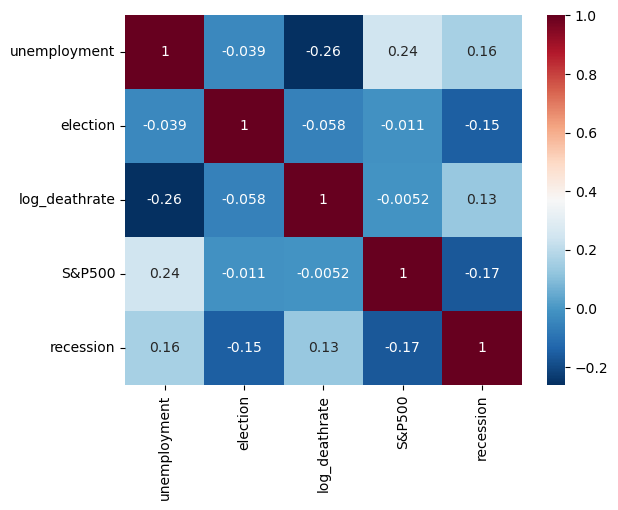

In [26]:
avg_final_2= averagefinal[["unemployment", "election", "log_deathrate", "S&P500", "recession"]]
heatmap = sns.heatmap(avg_final_2.corr(numeric_only=True), cmap="RdBu_r", annot=True)

No high correlation is spotted between the variables. Hence, we will proceed with training the data. 

In [27]:
input_vars = ["unemployment", "election", "log_deathrate", "S&P500", "recession"]
X = averagefinal[input_vars]  # The independent variables (features)
y = averagefinal["avg_danceability"]  # The dependent variable (target)

# Initialize and fit the linear regression model
X = sm.add_constant(X)
model = LinearRegression().fit(X, y)

# Print the coefficients for each variable
for var_name, var_coef in zip(input_vars, model.coef_):
    print(f"{var_name}: {var_coef:.2f}")

# Print the intercept of the model
print(f"Intercept: {model.intercept_:.2f}")

unemployment: 0.00
election: -0.00
log_deathrate: 0.00
S&P500: -0.18
recession: -0.01
Intercept: 1.89


We calculate residuals (the difference between actual and predicted valence) to assess the goodness of fit of the regression model. A residual plot is generated to visualize the pattern of residuals against predicted values.  This step is crucial for checking model assumptions like homoscedasticity (constant variance of errors) and identifying potential model issues like nonlinearity or outliers.

In [28]:
train_predictions = model.predict(X)
residuals = averagefinal["avg_danceability"] - train_predictions
residuals.head()

0   -0.013852
1   -0.000777
2   -0.012549
3   -0.036531
4   -0.038564
Name: avg_danceability, dtype: float64

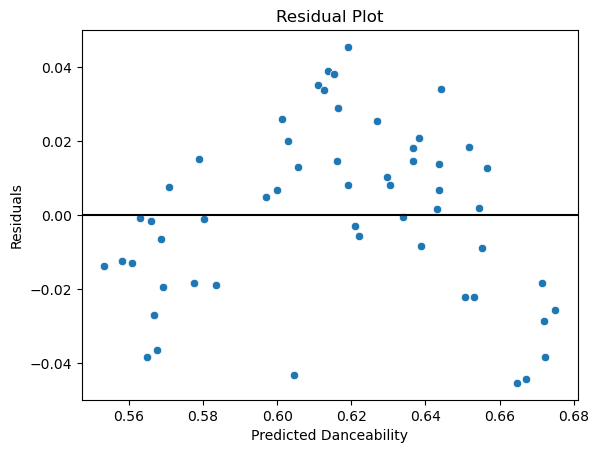

In [29]:
def generate_residual_plot(pred, resid):
    sns.scatterplot(x= pred, y=resid, marker="o")
    plt.axhline(y=0 ,color="black")
    plt.xlabel("Predicted Danceability")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()
generate_residual_plot(train_predictions, residuals)

Based on the residual plot, no fan shape is noticed. However, there is a quadratic pattern. We tried to square the independent variables but it didn't work. It is out of scope, we will proceed with our findings.

In [30]:
kf = KFold(n_splits = 5)
results = cross_validate(
    LinearRegression(),X,y,
    scoring='neg_root_mean_squared_error',
    cv=kf,return_train_score=True)
results_df = pd.DataFrame({
    'Train_RMSE':np.round(-1*results['train_score'],4),
    'Test_RMSE':np.round(-1*results['test_score'],4)})
print('Table summarizing train and test RMSE values across splits:') 
print(results_df)
print('Mean Train RMSE:',round(np.mean(results_df['Train_RMSE']),4))
print('Mean Test RMSE:', round(np.mean(results_df['Test_RMSE']),4))
print('Std Train RMSE:',round(np.std(results_df['Train_RMSE']),4))
print('Std Test RMSE:',round(np.std(results_df['Test_RMSE']),4))
print('Normalized Mean Test RMSE:',round(
    np.mean(results_df['Test_RMSE'])/(averagefinal['avg_danceability'].max() - 
                                      averagefinal['avg_danceability'].min()),4))

Table summarizing train and test RMSE values across splits:
   Train_RMSE  Test_RMSE
0      0.0200     0.0559
1      0.0233     0.0238
2      0.0208     0.0354
3      0.0242     0.0225
4      0.0167     0.0576
Mean Train RMSE: 0.021
Mean Test RMSE: 0.039
Std Train RMSE: 0.0026
Std Test RMSE: 0.0152
Normalized Mean Test RMSE: 0.2569


Based on the RMSE values above, we can conclude:
* The train RMSE values are overall relatively low, indicating that the model fits the training data well. The Mean Train RMSE of 0.021 suggests that on average the model's predictions are within a reasonable range.
* The test RMSE values are also overall relatively low and similar to the train RMSE values. The Mean Test RMSE of 0.039 is also approximately close to the mean train RMSE of 0.021, meaning we can assume reasonable generalization to unseen data. 
* The standard deviation of the Train RMSE values is 0.0029, indicating a relatively low variability between training sets.
* The standard deviation of the Test RMSE values is 0.0152 showing higher variability between the test sets than the training sets. This indicates that the model's ability to generalize to unseen data is slightly less consistent, but it is usually expected that a model's test RMSE values will have higher variation than it's train RMSE values. 


In [31]:
mae = mean_absolute_error(y, model.predict(X))
print(f'MAE: {round(mae,5)}')  

MAE: 0.01902


RMSE greater than MAE. Model is reliable 

Using statsmodels, we run an Ordinary Least Squares (OLS) regression to validate the linear regression results and provide more detailed statistical output, including p-values and R-squared values. This step ensures the statistical robustness of our findings and identifies which predictors are significant contributors to the model.

In [32]:
input_vars = ["unemployment", "election", "log_deathrate", "S&P500", "recession"]
X = averagefinal[input_vars]  # The independent variables (features)
y = averagefinal["avg_danceability"]  # The dependent variable (target)

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print('Multivar OLS Regression for Danceability:')
print(est.summary())

Multivar OLS Regression for Danceability:
                            OLS Regression Results                            
Dep. Variable:       avg_danceability   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     22.74
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           1.00e-11
Time:                        19:25:43   Log-Likelihood:                 129.16
No. Observations:                  55   AIC:                            -246.3
Df Residuals:                      49   BIC:                            -234.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
cons

**Evaluation of significance:**

* **Interpretation of coefficients**: 
    * `Unemployment Rate`: For a one unit increase in Unemployment Rate, all else equal, we expect the avg danceability of a popular song in a particular year to decrease by 0.0005 unit. 
    * `election`: When a country is having election, all else equal, we expect the avg danceability of a popular song in a particular year to increase by 0.0030 unit.
    * `Death rate (log)`: For a 1% increase in Death Rate, all else equal, we expect the avg danceability of a popular song in a particular year to decrease by 0.00184 unit.
  * `S&P500`: For a one unit increase in the S&P500 index, all else equal, we expect the avg danceability of a popular song in a particular year to decrease by 0.0053 unit. 
  * `Recession`: When a country is having recession, all else equal, we expect the avg danceability of a popular song in a particular year to decrease by 0.0106 unit.
 
* **Interpretation of p value**:
    * **Bonferroni  correction** needs to be performed as there are multiple independent variables. Alpha value which is 0.05 is divided by 5 which is equal to 0.01.
      
    * Only log_deathrate  have a p-value less than the alpha value 0.01 which are 0.000 . Hence, we can conclude that the model is statistical significance and that we can reject the null hypothesis for preregistration hypothesis 2.

    * Additionally, unemployment rate, election, S&P 500 and recession have a p-value greater than the alpha value 0.01 which are 0.816, 0.698 and 0.807 and 0.198 respectively. This suggest that the coef of these variables are  are not satistically significant.  

    * The model for hypothesis 2 is overall statistically significant in predicting danceability  with an extremely low p-value associated with the F-statistic of 1e-11.


# Expanding Hypothesis 2

Since recessions often bring heightened anxiety, uncertainty, and other negative sentiments, which could amplify the effect of unemployment on people’s attitudes and well-being. Therefore,  we suspect that there is some sort of relationship between unemployment and recession that will affect its outcome on valence. This is why we added the interaction term between unemployment and recession, which accounts for the possibility that the effect of unemployment on valence is conditional upon whether or not the economy is in a recession. 
 
However, the interaction plot showed no intersection, meaning there is no significant difference between the effect unemployment has on valence during recession years and non-recession years. 

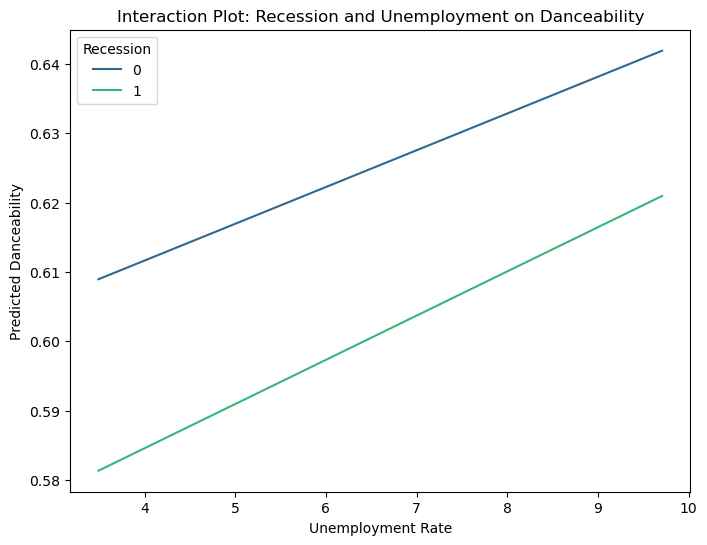

In [33]:
averagefinal['interaction'] = averagefinal['unemployment'] * averagefinal['recession']

# Define independent variables (including interaction) and dependent variable
X = averagefinal[['unemployment', 'recession', 'interaction']]
y = averagefinal['avg_danceability']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS regression model
interaction_model = sm.OLS(y, X).fit()

recession_levels = [0, 1]
unemployment_range = np.linspace(averagefinal['unemployment'].min(), averagefinal['unemployment'].max(), 100)

plot_data = pd.DataFrame({
    'unemployment': np.tile(unemployment_range, len(recession_levels)),
    'recession': np.repeat(recession_levels, len(unemployment_range))
})

plot_data['interaction'] = plot_data['unemployment'] * plot_data['recession']
plot_data = sm.add_constant(plot_data)


plot_data['predicted_danceability'] = interaction_model.predict(plot_data)

plt.figure(figsize=(8, 6))

sns.lineplot(
    data=plot_data,
    x='unemployment',  # Use avg_unemployment for the x-axis
    y='predicted_danceability',  # Predicted valence as the y-axis
    hue='recession',  # Recession levels as different lines
    palette="viridis"  # Optional: Adjust color scheme
)

plt.title("Interaction Plot: Recession and Unemployment on Danceability")
plt.xlabel("Unemployment Rate")
plt.ylabel("Predicted Danceability")
plt.legend(title="Recession")
plt.show()

We also suspect that stock returns may influence valence differently, depending on whether or not it's an election year due to domain knowledge. As elections often generate significant political and economic uncertainty, and people’s reactions to stock market fluctuations might be amplified or mitigated depending on whether it is an election year.Therefore, we created an interaction plot to better visualize how the predicted valence changes with stock returns across different election scenarios (election years vs. non-election years). This plot helps us to see whether the effect of stock returns on valence is consistent across both scenarios or whether it differs.

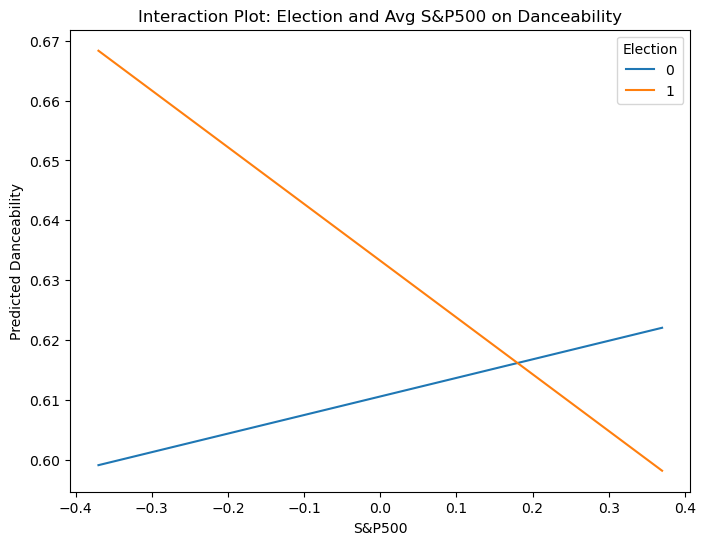

In [34]:
averagefinal['interaction'] = averagefinal['S&P500'] * averagefinal['election']

# Define independent variables (including interaction) and dependent variable
X = averagefinal[['S&P500', 'election', 'interaction']]
y = averagefinal['avg_danceability']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS regression model
interaction_model = sm.OLS(y, X).fit()

election_levels = [0, 1]
stockreturn_range = np.linspace(averagefinal['S&P500'].min(), averagefinal['S&P500'].max(), 100)

plot_data = pd.DataFrame({
    'S&P500': np.tile(stockreturn_range, len(election_levels)),
    'election': np.repeat(election_levels, len(stockreturn_range))
})

plot_data['interaction'] = plot_data['S&P500'] * plot_data['election']
plot_data = sm.add_constant(plot_data)


plot_data['predicted_danceability'] = interaction_model.predict(plot_data)

plt.figure(figsize=(8, 6))
sns.lineplot(
    data=plot_data,
    x='S&P500',
    y='predicted_danceability',
    hue='election'
)
plt.title("Interaction Plot: Election and Avg S&P500 on Danceability")
plt.xlabel('S&P500')
plt.ylabel("Predicted Danceability")
plt.legend(title="Election")
plt.show()

As observed in the interaction plot above, there is a noticeable intersection between the lines representing S&P500 return during election years and non-election years. This suggests that  S&P500 returns might influence public sentiment (valence) differently depending on whether it is an election year or not. The interaction term was included in the model to check whether this effect is statistically significant. 


## Update Hypothesis 2 model

In [35]:
averagefinal['stock_election'] = averagefinal['S&P500'] * averagefinal['election']


Xmar = averagefinal[['unemployment', 'log_deathrate', 
                     'recession', 'stock_election']]

ymar = averagefinal['avg_valence']
Xmar = sm.add_constant(Xmar)

est_interaction = sm.OLS(ymar, Xmar).fit()

print('Multivar OLS Regression for Valence:')
print(est_interaction.summary())

Multivar OLS Regression for Valence:
                            OLS Regression Results                            
Dep. Variable:            avg_valence   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     51.20
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           4.39e-17
Time:                        19:25:44   Log-Likelihood:                 116.93
No. Observations:                  55   AIC:                            -223.9
Df Residuals:                      50   BIC:                            -213.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const  

**Evaluation of significance:**

* **Interpretation of coefficients**: 
    * `Unemployment Rate`: For a one unit increase in Unemployment Rate, all else equal, we expect the avg danceability of a popular song in a particular year to decrease by 0.0097 unit. 
    * `Death rate (log)`: For a 1% increase in Death Rate, all else equal, we expect the avg danceability of a popular song in a particular year to increase by 0.003191 unit.
  * `stock_election`: For one unit increase in the interaction term stock_election, all else equal, the predicted value of danceability increases by 0.048 units.
  * `Recession`: When a country is having recession, all else equal, we expect the avg danceability of a popular song in a particular year to decrease by 0.0011 unit.
 
* **Interpretation of p value**:
    * **Bonferroni  correction** needs to be performed as there are multiple independent variables. Alpha value which is 0.05 is divided by 4 which is equal to 0.0125.
      
    * Only unemployment and log_deathrate have a p-value less than the alpha value 0.0125 which are 0.001 and 0.000. Hence, we can conclude that the model is statistical significance and that we can reject the null hypothesis for preregistration hypothesis 2.

    * Additionally, recession and stock_election have a p-value greater than the alpha value 0.0125 which are 0.912 and 0.299 respectively. This suggest that the coef of these variables are  are not satistically significant.  

    * The model for hypothesis 2 is overall statistically significant in predicting danceability  with an extremely low p-value associated with the F-statistic of 4.39e-17.

## Conclusion
#### Hypothesis 1: As GDP increases, the average valence of popular songs in a given year decreases.

For this hypothesis, we analyzed data by year, running a linear regression with GDP per capita as the input and the average valence (a measure of positivity in music) of popular songs in that year as the output.

Using a double-sided t-test and a significance level ($α$) of 5%, we found that the relationship between GDP per capita and average song valence was statistically significant, with a negative coefficient ($B$<0). Specifically, our model estimates that every unit increase in GDP per capita causes the average valence of popular songs in that year to decrease by 0.05 units. This result is reasonable given that the valence scale ranges from 0 to 1.

This finding aligns with our expectations and provides an intriguing perspective on how economic factors may influence cultural outputs such as music. A plausible explanation for this trend could be that as GDP per capita increases, societies may experience greater emotional complexity or stressors tied to wealth and modernity, leading to a preference for or production of less upbeat and more introspective or melancholic music.

To expand our understanding, we examined how other economic and social factors, such as fertility, death rates and federal funds rates, might impact song valence. We found that both death rates and federal funds rates variables also had statistically significant relationships with valence:

* Death Rate:  Every 1% increase in death rate of a year with result in 0.003010 unit of increase in a avg popular song's valence in that particular year. This strong positive correlation, with a p-value of 0.000, suggests that higher death rates may drive the production or popularity of more positive or uplifting music, perhaps as a response to collective grief or hardship.
* Federal Funds Rate: For every unit increase in the federal funds rate during a given year, the average valence of popular songs increased by 0.0088 units. With a p-value of 0.000, this suggests a subtler but still significant association, potentially reflecting the influence of economic policy and financial conditions on music sentiment.

Our linear regression model is not suitable to study the relationship between fertility and avg valence as the data remains heteroskedastic after log transformation and there is a significant difference between RSME within the train and test data. 

Overall,these findings illustrate the complex ways in which economic and social factors can influence the tone and emotional content of popular music, with GDP per capita driving a decrease in valence, while death rates and federal funds rates correspond to increases.


#### Hyphothesis 2:  Macroeconomic and sociopolitical factors influence the average danceability of popular songs in a given year.

For this hypothesis, we analyzed data using a multivariate regression model with the average danceability of popular songs as the output variable and macroeconomic and sociopolitical factor such as unemployment rate, election occurrence, death rate, S&P 500 index, and recession status, as input variables.

Based on the results of the regression analysis, we found that for a 1% increase in Death Rate, all else equal, we expect the avg danceability of a popular song in a particular year to decrease by 0.00184 unit. The p-value for this variable was 0.000, indicating that this relationship is statistically significant at the aplha value 0.01 after Bonferroni correction. This suggests that higher death rates may lead to less danceable music, possibly reflecting collective societal moods or shifts in cultural output during times of hardship.

In contrast, the coefficients for unemployment rate, election, S&P 500 index, and recession status were not statistically significant at the alpha level 0.01. Their respective p-values - 0.816, 0.698, 0.807, and 0.198—were all greater than 0.01, indicating insufficient evidence to conclude that these variables influence danceability. For example, while the model suggests that danceability decreases slightly during recessions (−0.0106) and increases slightly during election years (+0.0030), these effects were not statistically significant.

Despite the limited significance of individual predictors, the overall model for hypothesis 2 was statistically significant in predicting danceability, as indicated by an extremely low p-value associated with the F-statistic (p=1e−11). This suggests that, collectively, the variables included in the model provide meaningful insights into variations in song danceability across years.

These results provide partial support for our hypothesis, with the death rate emerging as the most impactful factor on danceability among the variables tested.


#### Inclusion of Interaction Term: 

As observed in the interaction plot above, there is a noticeable intersection between the lines representing average stock returns during election years and non-election years. This suggests that stock returns might influence public sentiment (and, by extension, song danceability) differently depending on whether it is an election year or not. The interaction term (stock_election) was included in the model to determine whether this effect is statistically significant.

The results of the updated regression are as follows:

**Significant Variables**
- Unemployment Rate: For a one-unit increase in the unemployment rate, all else equal, the average danceability of popular songs is expected to decrease by 0.0097 units. This relationship is statistically significant (p=0.001) at the adjusted alpha level of 0.0125.
- Death Rate (log-transformed): For a 1% increase in the death rate, all else equal, the average danceability of popular songs is expected to increase by 0.003191 units. This relationship is also statistically significant (p=0.000) at the adjusted alpha level of 0.0125.

The coefficients for recession and the stock_election interaction term were not statistically significant at the adjusted alpha level.

The overall model, including the interaction term, was statistically significant in predicting danceability, with an extremely low p-value associated with the F-statistic (p=4.39e−17).

These results suggest that while the interaction term provides insights into potential differences in the effect of stock returns during election years, it was not statistically significant. The unemployment rate and death rate (log-transformed) emerged as the most impactful predictors of danceability in this model.

# Limitations <a id="limitations"></a>

### Limitation of Yearly Aggregation
Our data is aggregated by year rather than month and year due to limitations in the availability of social variables such as birth rate, death rate, and incarceration rate on a monthly basis. This temporal limitation significantly impacts our ability to account for **lagging variables**, meaning that we cannot assess the delayed impact of economic or social events on music trends. For instance, we are unable to analyze how a recession in one month may influence the music released or consumed in subsequent months. Similarly, this yearly aggregation restricts us from capturing the effects of short-term, time-sensitive events, such as elections or other socio-political shifts, which may play a substantial role in shaping music trends. As a result, our findings may overlook nuanced relationships between social variables and music, leading to broader and less precise conclusions.
### Limited Data Points
One limitation of the dataset is that not all variables are averaged across years, which could introduce inconsistencies in the analysis. While some variables, like GDP and unemployment rate, are presented as annual averages, others, such as individual song metrics like danceability and valence, are not aggregated and instead represent individual observations. This discrepancy can create challenges in drawing meaningful relationships between macroeconomic variables and music sentiment, as the granularity of the data is inconsistent. For example, annual economic indicators are compared with song-level data, which may result in misinterpretation of trends or relationships due to differing levels of aggregation.
### Issues with Multicollinearity
Our data analysis faces challenges related to multicollinearity within the regression models, particularly visible through the Variance Inflation Factor (VIF). Multicollinearity occurs when independent variables in a regression model are highly correlated, leading to unreliable coefficient estimates and difficulty in determining the individual contribution of each variable. For example, social and economic variables like GDP growth and unemployment rate may show a high degree of correlation, complicating our ability to separate their independent effects on music sentiment and trends. This statistical issue could result in misleading interpretations of our data and reduce the robustness of our findings.
### Imperfect Representation of Human Emotions
The valence and danceability metrics from Spotify data, while valuable proxies, do not comprehensively encapsulate the complexity of human emotions. Valence measures perceived positivity of a track, and danceability reflects rhythm and beat, but neither metric can fully capture nuanced emotional responses, such as melancholy or nostalgia, that music can evoke. This oversimplification may lead to discrepancies between the analyzed data and the actual emotional experiences of listeners. Consequently, conclusions drawn about how social and economic factors influence music sentiment may miss subtleties and fail to accurately reflect the broader spectrum of human emotional expression.
### Limited Representativeness of Billboard and Spotify Data
The reliance on Billboard’s top charts and Spotify data presents another significant limitation in our study. These platforms, while widely recognized, are not fully representative of the diverse listening habits of the US population. Billboard charts primarily reflect popular music consumption, which may disproportionately highlight mainstream trends, while Spotify data is limited to users of the platform and does not account for listeners on other platforms such as Apple Music, YouTube, or traditional radio. This lack of inclusivity could introduce biases, excluding niche or underrepresented genres and demographics, and ultimately skew our results to favor the preferences of certain groups rather than the population as a whole.

## Acknowledgements and Bibliography <a id="references"></a>
Think of this as your Problem 0: what
tools, data, or resources did you use that you should cite? You may format this
section with any citation style.
rubric: Clearly marked and formatted. The group thoughtfully engages with relevant literature on their topic in order to motivate and/or contextualize their findings. All external sources are properly cited in the bibliography and with appropriate in-text citations.

Plot 2 y variables in a graph: https://stackoverflow.com/questions/55654500/seaborn-plot-with-second-y-axis
Seaboard color palette: https://seaborn.pydata.org/tutorial/color_palettes.html
Fix the size of heat map:https://scales.arabpsychology.com/stats/how-to-adjust-the-size-of-heatmaps-in-seaborn/

boxcox https://sixsigmastudyguide.com/box-cox-transformation/

# Appendix

Modeling and Visualization

GDP Coeff: -0.0
Intercept: 0.6793


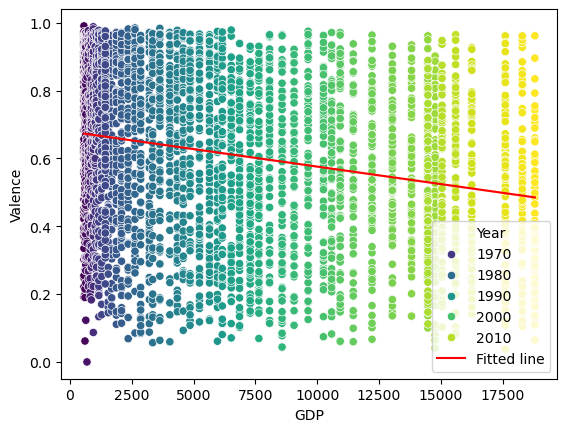

In [36]:
# --- GDP and Valence ---
X_gdp = final[["US_GDP"]].values
y_gdp = final["valence"].values
model = LinearRegression().fit(X_gdp, y_gdp)
y_pred_gdp = model.predict(X_gdp)
print("GDP Coeff:", round(model.coef_[0], 4))
print(f"Intercept: {model.intercept_:.4f}")

sns.scatterplot(data=final, x="US_GDP", y="valence", hue="year", palette="viridis")
sns.lineplot(x=final["US_GDP"], y=y_pred_gdp, color="red", label="Fitted line")
plt.xlabel("GDP")
plt.ylabel("Valence")
plt.legend(loc="lower right", title="Year") 

# Show the plot
plt.show()


# Residual is plotted to check if there is any heteroskedasticity and if so, log transformation will be performed. No heteroskedasticity is noticed. 

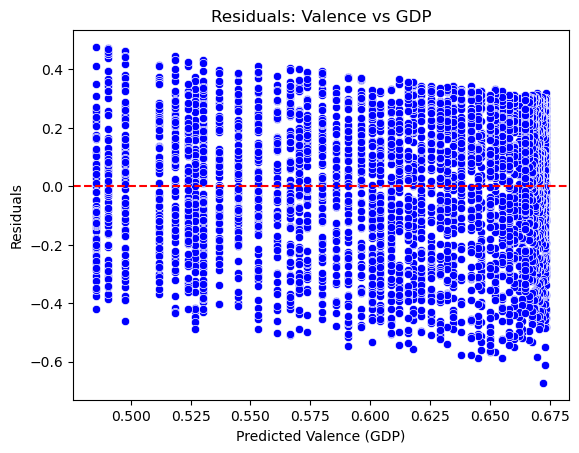

In [37]:
# GDP and Valence
X_gdp = final[["US_GDP"]].values
y_gdp = final["valence"].values
model = LinearRegression().fit(X_gdp, y_gdp)
y_pred_gdp = model.predict(X_gdp)

residuals_gdp = y_gdp - y_pred_gdp

sns.scatterplot(data= final,x= y_pred_gdp, y= residuals_gdp, color="blue")
plt.axhline(y=0, color='red', linestyle='--')  # Add a line at zero
plt.title("Residuals: Valence vs GDP")
plt.xlabel("Predicted Valence (GDP)")
plt.ylabel("Residuals")


# Show the plot
plt.show()

Perform cross validation to examine model performance and generalizability.

In [38]:
X = final[['US_GDP']]
y = final['valence']
kf = KFold(n_splits = 5)
results = cross_validate(
    LinearRegression(),X,y,
    scoring='neg_root_mean_squared_error',
    cv=kf,return_train_score=True)
results_df = pd.DataFrame({
    'Train_RMSE':np.round(-1*results['train_score'],4),
    'Test_RMSE':np.round(-1*results['test_score'],4)})
print('Table summarizing train and test RMSE values across splits:') 
print(results_df)
print('Mean Train RMSE:',round(np.mean(results_df['Train_RMSE']),4))
print('Mean Test RMSE:', round(np.mean(results_df['Test_RMSE']),4))
print('Std Train RMSE:',round(np.std(results_df['Train_RMSE']),4))
print('Std Test RMSE:',round(np.std(results_df['Test_RMSE']),4))
print('Normalized Test RMSE:',round(
    np.mean(results_df['Test_RMSE'])/(final['valence'].max() - 
                                      final['valence'].min()),4))

Table summarizing train and test RMSE values across splits:
   Train_RMSE  Test_RMSE
0      0.2353     0.2235
1      0.2290     0.2479
2      0.2314     0.2392
3      0.2337     0.2296
4      0.2347     0.2266
Mean Train RMSE: 0.2328
Mean Test RMSE: 0.2334
Std Train RMSE: 0.0023
Std Test RMSE: 0.009
Normalized Test RMSE: 0.2355


In [39]:
mae = mean_absolute_error(y, model.predict(X))
print(f'MAE: {round(mae,5)}')  

MAE: 0.19743


/opt/anaconda3/envs/info2950/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


RMSE greater than MAE. Model is reliable 

Based on the RMSE values above, we can conclude: 
* The model seems to have consistent performance across different splits, as indicated by the similar train and test RMSE values for each split. The RMSE values are contained in a small range, from 0.2263-0.2385.
* The mean train RMSE value is relatively lower than the mean test RMSE. This indicates that in general the model perform better in the training model. The mean test RMSE value of 0.2353 suggests that on average, the model's predictions are within a reasonable range of the actual values in the test data.
* Looking across splits, the test RMSE values are relatively close to the training RMSE values. Additionally, the train and test RMSE means across splits are approximately equal, with the mean train RMSE at 0.2337 and the mean test RMSE at 0.2353. Thus, we can assume reasonable generalization to unseen data. 
* The standard deviation of the Train RMSE is 0.0019, showing relatively low variability in the model's predictions between training sets.
* The standard deviation of the Test RMSE is 0.0068, suggesting higher variability compared to the training set. Therefore, we can conclude that the model's ability to generalize to unseen data is less consistent. However, based on the fact that that the mean train RMSE and mean test RMSE are similar, and that the test standard deviation is still relatively low, we can still assume reasonable generalization.
* We decided to calculate and analyze the normalized RMSE value for hypothesis 1 to gain a better idea of if this RMSE value was “good.” Based on an article we found about normalizing RMSE, we calculated the normalized RMSE to get a value between 0 and 1 where values closer to 0 are considered “better” results. This is helpful because RMSE values are sometimes hard to compare because of unit inconsistencies and the range of the dataset itself. From this normalization, we got an RMSE value of 0.2374, which is relatively close to 0 and thus suggests the regression model fits the test data well. 
* The referenced article can be found at the following link: https://www.statology.org/what-is-a-good-rmse/#:~:text=Normalizing%20the%20RMSE%20Value&text=This%20produces%20a%20value%20between,is%20between%20%2470%2C000%20and%20%24300%2C000 

Finally, we run an OLS regression. Running an OLS regression with statistical output provides detailed metrics, such as p-values and confidence intervals, which are crucial for hypothesis testing.

In [40]:
X = final[["US_GDP"]]  
y = final["valence"] 

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                valence   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     239.1
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           2.12e-52
Time:                        19:25:44   Log-Likelihood:                 150.50
No. Observations:                3922   AIC:                            -297.0
Df Residuals:                    3920   BIC:                            -284.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6793      0.006    112.573      0.0

# Summary
- alpha value: 5%
- double sided t test
- statistically significant, B<0
- every unit increase in gdp will cause average valence of popular songs in the year to decrease by 0.05 unit. (reasonable since the scale is only 0-1)

# Expanding Hypothesis 1

Visualization

Fertility Coeff: 0.0642
Intercept: 0.4714
Death Rate Coeff: 0.0003
Intercept: 0.3080
Fed Funds Rate Coeff: 0.0093
Intercept: 0.5572


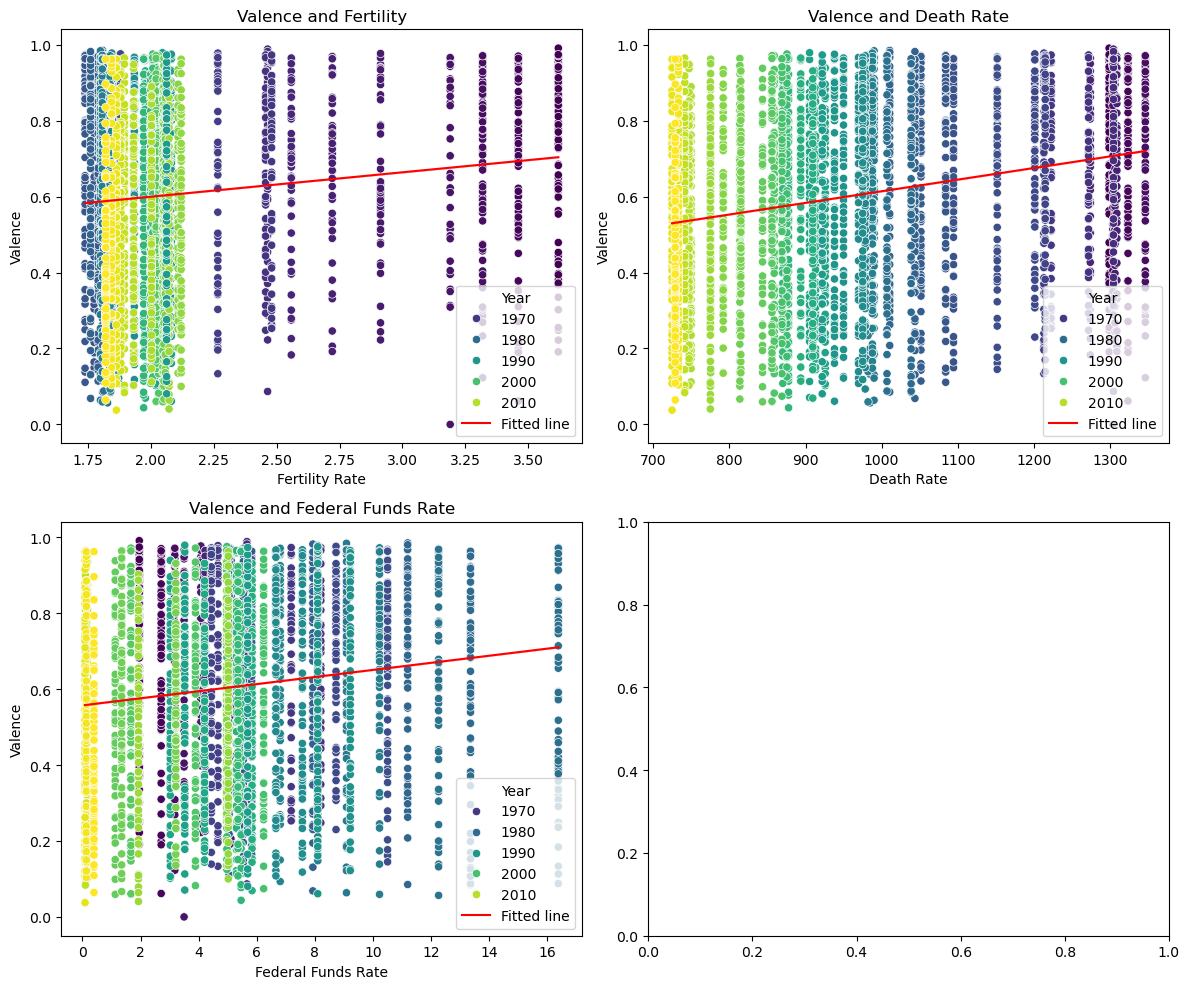

In [41]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Adjust figsize for better spacing

# --- Fertility and Valence ---
X_fertility = final[["fertility"]].values
y_fertility = final["valence"].values
model = LinearRegression().fit(X_fertility, y_fertility)
y_pred_fertility = model.predict(X_fertility)
print("Fertility Coeff:", round(model.coef_[0], 4))
print(f"Intercept: {model.intercept_:.4f}")

sns.scatterplot(data=final, x="fertility", y="valence", hue="year", palette="viridis", ax=axs[0, 0])
sns.lineplot(x=final["fertility"], y=y_pred_fertility, color="red", label="Fitted line", ax=axs[0, 0])
axs[0, 0].set_title("Valence and Fertility")
axs[0, 0].set_xlabel("Fertility Rate")
axs[0, 0].set_ylabel("Valence")
axs[0, 0].legend(loc="lower right", title="Year") 

# --- Death Rate and Valence ---
X_deathrate = final[["DeathRate"]].values
y_deathrate = final["valence"].values
model = LinearRegression().fit(X_deathrate, y_deathrate)
y_pred_deathrate = model.predict(X_deathrate)
print("Death Rate Coeff:", round(model.coef_[0], 4))
print(f"Intercept: {model.intercept_:.4f}")

sns.scatterplot(data=final, x="DeathRate", y="valence", hue="year", palette="viridis", ax=axs[0, 1])
sns.lineplot(x=final["DeathRate"], y=y_pred_deathrate, color="red", label="Fitted line", ax=axs[0, 1])
axs[0, 1].set_title("Valence and Death Rate")
axs[0, 1].set_xlabel("Death Rate")
axs[0, 1].set_ylabel("Valence")
axs[0, 1].legend(loc="lower right", title="Year") 

# --- Federal Funds Rate and Valence ---
X_fedfundrate = final[["fedfundrate"]].values
y_fedfundrate = final["valence"].values
model = LinearRegression().fit(X_fedfundrate, y_fedfundrate)
y_pred_fedfundrate = model.predict(X_fedfundrate)
print("Fed Funds Rate Coeff:", round(model.coef_[0], 4))
print(f"Intercept: {model.intercept_:.4f}")

sns.scatterplot(data=final, x="fedfundrate", y="valence", hue="year", palette="viridis", ax=axs[1, 0])
sns.lineplot(x=final["fedfundrate"], y=y_pred_fedfundrate, color="red", label="Fitted line", ax=axs[1, 0])
axs[1, 0].set_title("Valence and Federal Funds Rate")
axs[1, 0].set_xlabel("Federal Funds Rate")
axs[1, 0].set_ylabel("Valence")
axs[1, 0].legend(loc="lower right", title="Year") 

# Adjust layout to avoid overlap
plt.tight_layout()

plt.show()


Residual plot to check the presence of heteroskedasticity. No heteroskedastic data is spotted. 

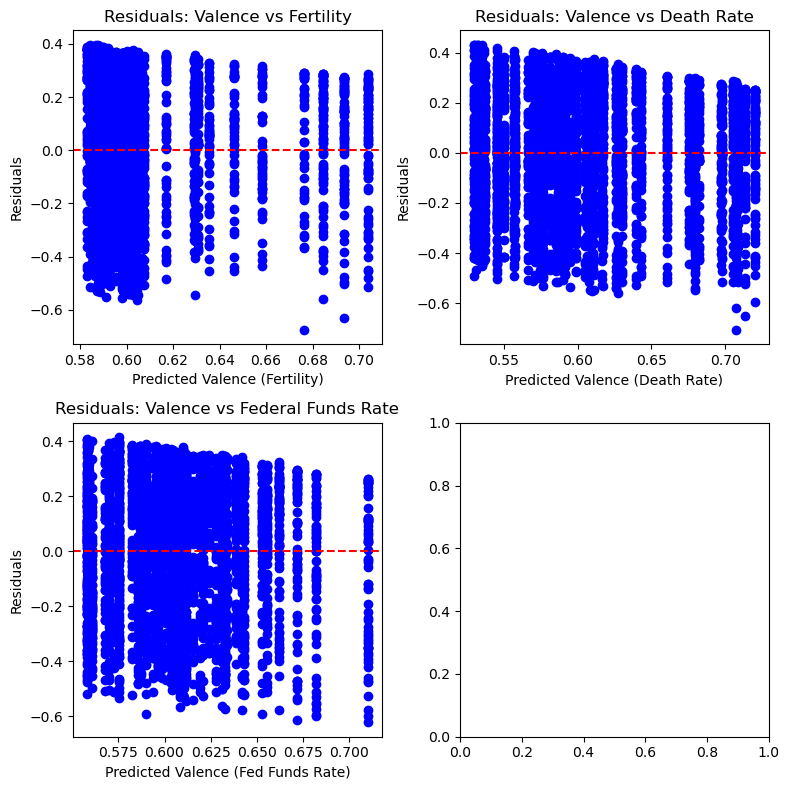

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Fertility and Valence
X_fertility = final[["fertility"]].values
y_fertility = final["valence"].values
model = LinearRegression().fit(X_fertility, y_fertility)
y_pred_fertility = model.predict(X_fertility)


residuals_fertility = y_fertility - y_pred_fertility


axs[0, 0].scatter(y_pred_fertility, residuals_fertility, color="blue")
axs[0, 0].axhline(y=0, color='red', linestyle='--')  # Add a line at zero
axs[0, 0].set_title("Residuals: Valence vs Fertility")
axs[0, 0].set_xlabel("Predicted Valence (Fertility)")
axs[0, 0].set_ylabel("Residuals")

# Death Rate and Valence
X_deathrate = final[["DeathRate"]].values
y_deathrate = final["valence"].values
model = LinearRegression().fit(X_deathrate, y_deathrate)
y_pred_deathrate = model.predict(X_deathrate)


residuals_deathrate = y_deathrate - y_pred_deathrate


axs[0, 1].scatter(y_pred_deathrate, residuals_deathrate, color="blue")
axs[0, 1].axhline(y=0, color='red', linestyle='--')  # Add a line at zero
axs[0, 1].set_title("Residuals: Valence vs Death Rate")
axs[0, 1].set_xlabel("Predicted Valence (Death Rate)")
axs[0, 1].set_ylabel("Residuals")

# Federal Funds Rate and Valence 
X_fedfundrate = final[["fedfundrate"]].values
y_fedfundrate = final["valence"].values
model = LinearRegression().fit(X_fedfundrate, y_fedfundrate)
y_pred_fedfundrate = model.predict(X_fedfundrate)


residuals_fedfundrate = y_fedfundrate - y_pred_fedfundrate


axs[1, 0].scatter(y_pred_fedfundrate, residuals_fedfundrate, color="blue")
axs[1, 0].axhline(y=0, color='red', linestyle='--')  # Add a line at zero
axs[1, 0].set_title("Residuals: Valence vs Federal Funds Rate")
axs[1, 0].set_xlabel("Predicted Valence (Fed Funds Rate)")
axs[1, 0].set_ylabel("Residuals")


plt.tight_layout()

In [43]:
input = ['fertility','DeathRate','fedfundrate']
for factor in input:
    X = final[[factor]]
    y = final['valence']
    kf = KFold(n_splits = 5)
    results = cross_validate(
        LinearRegression(),X,y,
        scoring='neg_root_mean_squared_error',
        cv=kf,return_train_score=True)
    print(f'Train and test RMSE values for {factor}:')
    print('Mean Train RMSE:',round(np.mean(-1*results['train_score']),4))
    print('Mean Test RMSE:', round(np.mean(-1*results['test_score']),4))
    print('Std Train RMSE:',round(np.std(-1*results['train_score']),4))
    print('Std Test RMSE:',round(np.std(-1*results['test_score']),4))
    print('Normalized Test RMSE:',round(
        np.mean(-1*results['test_score'])/(
            final['valence'].max() - final['valence'].min()),4))
    print(' ')

Train and test RMSE values for fertility:
Mean Train RMSE: 0.2374
Mean Test RMSE: 0.2771
Std Train RMSE: 0.0023
Std Test RMSE: 0.065
Normalized Test RMSE: 0.2797
 
Train and test RMSE values for DeathRate:
Mean Train RMSE: 0.2332
Mean Test RMSE: 0.2349
Std Train RMSE: 0.0025
Std Test RMSE: 0.0088
Normalized Test RMSE: 0.2371
 
Train and test RMSE values for fedfundrate:
Mean Train RMSE: 0.2371
Mean Test RMSE: 0.2409
Std Train RMSE: 0.0016
Std Test RMSE: 0.0063
Normalized Test RMSE: 0.2431
 


Based on the RMSE values above, we can conclude:

* Fertility: The model seems to have consistent performance across different splits for the fertility data, as indicated by the similar mean train and mean test RMSE values of 0.238 and 0.2866, respectively. The low standard deviations of 0.002 for the training sets and 0.083 for the test sets also indicate that there is low variability between training sets and test sets.
* DeathRate: The model appears to be very consistent across different splits for the deathrate data with similar mean train and mean test RMSE values of 0.2338 and 0.2347, respectively. The low standard deviations of 0.0019 for the training sets and 0.0075 for the test sets also indicate that there is low variability between training sets and test sets.
* fedfundrate: The model seems to have consistent performance across splits for the fedfundrate data, seen by the similar mean train and test RMSE values of 0.2379 and 0.242. The  low standard deviation of 0.0015 indicates low variability across training sets, as does the still relatively low value of 0.0062 for the standard deviation across test sets.

Overall, the model seems to perform consistently across these three factors. 

## OLS Regression to evaluate significance:


In [44]:
for factor in input:
    X = final[[factor]]
    y = final['valence']
    X_with_constant = sm.add_constant(X)
    model = sm.OLS(y,X_with_constant)
    results = model.fit()
    print(results.summary())
    print(' ')

                            OLS Regression Results                            
Dep. Variable:                valence   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     50.77
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           1.23e-12
Time:                        19:25:46   Log-Likelihood:                 59.636
No. Observations:                3922   AIC:                            -115.3
Df Residuals:                    3920   BIC:                            -102.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4714      0.019     24.498      0.0

**Evaluation of Significance**

* Fertility: 
    * Fertility coefficient: Every unit increase in fertility rate of a year with result in 0.0585 unit of increase in a popular song's valence in that particular year.
    * P-value: The p-value for fertility is 0.000, indicating that this model is significant.
* DeathRate: 
    * Deathrate coefficient: Every unit increase in death rate of a year with result in 0.3019 unit of increase in a popular song's valence in that particular year.
    * P-value: The p-value for deathrate is 0.000, indicating that this model is significant.
* fedfundrate: 
   * fedfundrate coefficient: Every unit increase in fedfundrate of a year with result in 0.009 unit of increase in a popular song's valence in that particular year.
    * P-value: The p-value for fedfundrate is 0.000, indicating that this model is significant.

